In [262]:
#pip install setuptools wheel numpy scipy scikit-learn -U;

In [263]:
#pip install --upgrade vaex;

In [264]:
#!pip install catboost

In [2]:
#pip install imblearn

In [3]:
#pip install --upgrade pip

In [265]:
#pip install lightgbm

In [266]:
#import sys
#!conda install --yes --prefix {sys.prefix} -c conda-forge lightgbm

In [108]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import time
import re
# featuretools for automated feature engineering
#import featuretools as ft

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# memory management
import gc

In [3]:
missing = ['n/a','na',999, 'NUL']

df = pd.read_csv('~/Desktop/response_model.csv', na_values = missing)

X = pd.DataFrame(df.iloc[:,1:1476])
y = df['inq_ind']

In [4]:
print(X.shape)
print(y.shape)

(398888, 1475)
(398888,)


In [5]:
pd.set_option('display.max_columns', None)
X.head()

,RETS101,RETS102,RETS103,RETS104,RETS105,RETS106,RETS107,RETS108,RETS109,RETS110,RETS111,RETS112,RETS113,RETS114,RETS115,RETS116,RETS117,RETS118,RETS119,RETS120,RETS121,RETS122,RETS123,RETS124,RETS901,RETS902,RETS903,RETS904,RETS905,RTDEX01,RTDEX02,RTDEXQ1,RTDEXQ2,RTDEXQ3,RTDEXQ4,WALSRTS1,WALSRTS2,REVS101,REVS102,REVS103,REVS104,REVS105,REVS106,REVS107,REVS108,REVS109,REVS110,REVS111,REVS112,REVS113,REVS114,REVS115,REVS116,REVS117,REVS118,REVS119,REVS120,REVS121,REVS122,REVS123,REVS124,REVS901,REVS902,REVS903,REVS904,REVS905,RVDEX01,RVDEX02,RVDEXQ1,RVDEXQ2,RVDEXQ3,RVDEXQ4,WALSRVS1,WALSRVS2,AGGS101,AGGS102,AGGS103,AGGS104,AGGS105,AGGS106,AGGS107,AGGS108,AGGS109,AGGS110,AGGS111,AGGS112,AGGS113,AGGS114,AGGS115,AGGS116,AGGS117,AGGS118,AGGS119,AGGS120,AGGS121,AGGS122,AGGS123,AGGS124,AGGS901,AGGS902,AGGS903,AGGS904,AGGS905,INDEX01,INDEX02,INDEXQ1,INDEXQ2,INDEXQ3,INDEXQ4,WALSHRS1,WALSHRS2,CV01,CV02,CV03,CV04,CV05,CV06,CV07,CV08,CV09,CV10,CV11,CV12,CV13,CV14,CV15,CV16,CV17,CV18,CV19,CV20,CV21,CV22,CV23,CV24,CV25,CV26,CV27,CV28,CV29,CV30,RVLR78,RVLR79,RVLR80,RVLR81,EODDATE,AGG101,AGG102,AGG103,AGG104,AGG105,AGG106,AGG107,AGG108,AGG109,AGG110,AGG111,AGG112,AGG113,AGG114,AGG115,AGG116,AGG117,AGG118,AGG119,AGG120,AGG121,AGG122,AGG123,AGG124,AGG201,AGG202,AGG203,AGG204,AGG205,AGG206,AGG207,AGG208,AGG209,AGG210,AGG211,AGG212,AGG213,AGG214,AGG215,AGG216,AGG217,AGG218,AGG219,AGG220,AGG221,AGG222,AGG223,AGG224,AGG301,AGG302,AGG303,AGG304,AGG305,AGG306,AGG307,AGG308,AGG309,AGG310,AGG311,AGG312,AGG313,AGG314,AGG315,AGG316,AGG317,AGG318,AGG319,AGG320,AGG321,AGG322,AGG323,AGG324,AGG401,AGG402,AGG403,AGG404,AGG405,AGG406,AGG407,AGG408,AGG409,AGG410,AGG411,AGG412,AGG413,AGG414,AGG415,AGG416,AGG417,AGG418,AGG419,AGG420,AGG421,AGG422,AGG423,AGG424,AGG501,AGG502,AGG503,AGG504,AGG505,AGG506,AGG507,AGG508,AGG509,AGG510,AGG511,AGG512,AGG513,AGG514,AGG515,AGG516,AGG517,AGG518,AGG519,AGG520,AGG521,AGG522,AGG523,AGG524,AGG601,AGG602,AGG603,AGG604,AGG605,AGG606,AGG607,AGG608,AGG609,AGG610,AGG611,AGG612,AGG613,AGG614,AGG615,AGG616,AGG617,AGG618,AGG619,AGG620,AGG621,AGG622,AGG623,AGG624,AGG701,AGG702,AGG703,AGG704,AGG705,AGG706,AGG707,AGG708,AGG709,AGG710,AGG711,AGG712,AGG713,AGG714,AGG715,AGG716,AGG717,AGG718,AGG719,AGG720,AGG721,AGG722,AGG723,AGG724,AGG801,AGG802,AGG803,AGG804,AGG805,AGG806,AGG807,AGG808,AGG809,AGG810,AGG811,AGG812,AGG813,AGG814,AGG815,AGG816,AGG817,AGG818,AGG819,AGG820,AGG821,AGG822,AGG823,AGG824,AGG901,AGG902,AGG903,AGG904,AGG905,AGG906,AGG907,AGG908,AGG909,AGG910,AGG911,TRD,BC_TRD,INST_TRD,REV_TRD,RTL_TRD,PAYMNT01,PAYMNT02,PAYMNT03,PAYMNT04,PAYMNT05,PAYMNT06,PAYMNT07,PAYMNT08,PAYMNT09,PAYMNT10,PAYMNT11,TRV01,TRV02,TRV03,TRV04,TRV05,TRV06,TRV07,TRV08,TRV09,TRV10,TRV11,TRV12,TRV13,TRV14,TRV15,TRV16,TRV17,TRV18,TRV19,TRV20,TRV21,TRV22,TRV23,BALMAG01,BALMAG02,WALSHR01,WALSHR02,WALSHR03,WALSHR04,WALSHR05,WALSHR06,WALSHR07,WALSHR08,WALSHR09,WALSHR10,RVLR01,RVLR02,RVLR03,RVLR04,RVLR05,RVLR06,RVLR07,RVLR08,RVLR09,RVLR10,RVLR11,RVLR12,RVLR13,RVLR14,RVLR15,RVLR16,RVLR17,RVLR18,RVLR19,RVLR20,RVLR21,RVLR22,RVLR23,RVLR24,RVLR25,RVLR26,RVLR27,RVLR28,RVLR29,RVLR30,RVLR31,RVLR32,RVLR33,BCPMTNUM,RLE901,RLE902,RLE903,RLE904,RLE905,RLE906,RLE907,REV315,REV316,REV317,REV318,REV319,REV320,REV321,REV322,REV323,REV324,REV325,REV326,REV327,REV328,BKC315,BKC316,BKC317,BKC318,BKC319,BKC320,BKC321,BKC322,BKC323,BKC324,BKC325,BKC326,BKC327,BKC328,RET315,RET316,RET317,RET318,RET319,RET320,RET321,RET322,RET323,RET324,RET325,RET326,RET327,RET328,REV11,REV12,REV13,REV14,REV51,REV52,REV53,REV54,REV81,REV82,REV83,REV84,REV92,REV102,REV112,REV122,REV132,REV142,REV152,REV162,BKC11,BKC12,BKC13,BKC14,BKC51,BKC52,BKC53,BKC54,BKC81,BKC82,BKC83,BKC84,BKC92,BKC102,BKC112,BKC122,BKC132,BKC142,BKC152,BKC162,RET11,RET12,RET13,RET14,RET51,RET52,RET53,RET54,RET81,RET82,RET83,RET84,RET92,RET102,RET112,RET122,RET132,RET142,RET152,RET162,P02A,P02B,P02C,P02D,P02E,P02F,P02G,P02H,P03A,P03B,P03C,P03D,P03E,P03F,P03G,P03H,REV201,REV202,REV203,REV204,REV205,REV222,REV223,REV224,REV225,BKC201,BKC

In [6]:
print(y.value_counts())
print(sum(y)/len(y))

0    386516
1     12372
Name: inq_ind, dtype: int64
0.031016225105794108


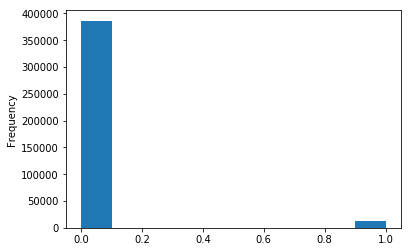

In [7]:
y.astype(int).plot.hist()

## Preprocess

In [8]:
X = pd.get_dummies(X, columns=['FICO_GROUP'])

In [9]:
drop_col=['RVLR78','RVLR79','RVLR80','RVLR81','EODDATE','RVLR14','RVLR15',
           'RVLR16','RVLR17','RVLR18','RVLR19','RVLR20','RVLR21','RVLR22',
           'RVLR23','RVLR24','RVLR25','RVLR26','RVLR27','RVLR28','BKC201',
           'BKC202','BKC203','BKC204','BKC205','BKC222','BKC223','BKC224',
           'BKC225','RVL1MCTA','ALL1MCTA','RVL6MCTA','ALL6MCTA','RVL1YCTA',
           'ALL1YCTA','BKC231','BKC232','BKC233','BKC234','BKC235','BKC252',
           'BKC253','BKC254','BKC255']

X = X.drop(columns = drop_col)

In [10]:
X.shape

(398888, 1437)

In [11]:
start = time.time()

X[X < 0] = np.nan

end = time.time()
print("total time:",end-start)

total time: 4161.094169139862


In [30]:
# drop any missing ratio>0.6
X = X[X.columns[X.isnull().mean() < 0.6]]

## Missing Value

In [26]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [33]:
# Missing values statistics
missing_values = missing_values_table(X)
missing_values.head(20)

Your selected dataframe has 1066 columns.
There are 1050 columns that have missing values.


,Missing Values,% of Total Values
PB24S,239264,60.0
PB35S,236860,59.4
PB32S,236852,59.4
PB33S,236851,59.4
PB57S,236850,59.4
PB34S,236844,59.4
PB30S,236844,59.4
PB31S,236844,59.4
PB28S,236844,59.4
PB29S,236844,59.4


## Identify Correlated Variables

In [83]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
corr_matrix.head()

,AU204S,AU205S,AU206S,AU207S,G403S,G407S,G411S,G415S,G199B,G200B,G205B,G206B,G207B,G208B,AD01A,AD01B,AD01C,AD01D,AD01E,AD01F,AD01G,AD01H,AD02A,AD02B,AD02C,AD02D,AD02E,AD02F,AD02G,AD02H,AD03A,AD03B,AD03C,AD03D,AD03E,AD03F,AD03G,AD03H,AD04A,AD04B,AD04C,AD04D,AD04E,AD04F,AD04G,AD04H,AD05A,AD05B,AD05C,AD05D,AD05E,AD05F,AD05G,AD05H,AD06A,AD06B,AD06C,AD06D,AD07A,AD08A,AD09A,AD12A,AD12B,AD12C,AD12D,AD12E,AD12F,AD12G,AD12H,AD13G,AD13H,AD14A,AD14B,AD14C,AD14D,AD14E,AD14F,AD14G,AD14H,REV231,REV232,REV233,REV234,REV235,REV252,REV253,REV254,REV255,RET232,RET233,RET234,RET235,RET252,RET253,RET254,RET255,AUT231,AUT232,AUT233,AUT234,AUT235,AUT252,AUT253,AUT254,AUT255,ALL231,ALL232,ALL233,ALL234,ALL235,ALL252,ALL253,ALL254,ALL255,CVBCR,CVCP,CVHELP2,CVMTGP,CVHEP,CVBK,CVNA,CVBCP,CVBB
AU204S,1.000000,0.559469,0.410662,0.626379,0.020340,0.051343,0.028390,0.063650,0.071350,0.000470,0.050158,0.041600,0.072687,0.020668,0.011341,0.015172,0.026429,0.018367,0.017290,0.019872,0.023261,0.025120,0.001315,0.003139,0.007519,0.006757,0.008820,0.010682,0.013710,0.014127,0.003683,0.007037,0.015858,0.016271,0.017483,0.021346,0.025354,0.025900,0.003688,0.006890,0.012307,0.012144,0.014312,0.016837,0.020946,0.021720,0.004382,0.007776,0.014958,0.015858,0.017487,0.021170,0.024949,0.025251,0.019412,0.001181,0.013695,0.005123,0.019214,0.000285,0.018750,0.013885,0.018107,0.029849,0.036859,0.043676,0.050896,0.056477,0.058194,0.041788,0.036678,0.006644,0.009342,0.018776,0.025881,0.031725,0.038385,0.044419,0.047618,0.019920,0.026606,0.032853,0.041243,0.048523,0.024934,0.030344,0.037682,0.037962,0.016462,0.017400,0.023677,0.032351,0.016532,0.016250,0.022246,0.026956,0.000007,0.003270,0.005765,0.009235,0.016020,0.004799,0.006835,0.007323,0.010450,0.013093,0.021087,0.025878,0.037470,0.053264,0.018053,0.024004,0.032825,0.044895,0.158485,0.088710,0.231835,0.063260,0.098091,0.099134,0.172601,0.060367,0.065193
AU205S,0.559469,1.000000,0.366849,0.634988,0.008442,0.023990,0.006967,0.052059,0.045242,0.002901,0.031404,0.035781,0.045834,0.009711,0.007148,0.011189,0.022499,0.016155,0.016797,0.019445,0.022266,0.023287,0.000090,0.002431,0.003924,0.004666,0.007793,0.009868,0.011082,0.011847,0.001540,0.005098,0.014440,0.014800,0.016515,0.020296,0.022816,0.022994,0.000599,0.005653,0.011352,0.011364,0.013060,0.016825,0.019336,0.019636,0.001440,0.004831,0.013248,0.014075,0.015791,0.019639,0.022284,0.022480,0.015232,0.004596,0.010711,0.006944,0.012682,0.000487,0.011893,0.009503,0.014399,0.026580,0.032896,0.038893,0.044446,0.048966,0.049567,0.034835,0.030583,0.004174,0.007568,0.017554,0.024238,0.029996,0.036024,0.041346,0.043306,0.011930,0.015195,0.017529,0.022177,0.025531,0.014621,0.016171,0.020732,0.020414,0.014461,0.014391,0.017284,0.022124,0.013497,0.012838,0.015806,0.017763,0.010422,0.017985,0.024247,0.030760,0.035590,0.017747,0.020950,0.021983,0.024506,0.011877,0.017902,0.023382,0.031467,0.042583,0.015831,0.022199,0.027773,0.037889,0.130397,0.057890,0.179135,0.050925,0.066579,0.103485,0.144328,0.067956,0.046894
AU206S,0.410662,0.366849,1.000000,0.351934,0.009328,0.019820,0.005610,0.029300,0.033751,0.001205,0.022081,0.024066,0.033757,0.008329,0.005858,0.007964,0.019076,0.013666,0.012750,0.013913,0.016647,0.017683,0.002301,0.000817,0.000114,0.002494,0.005758,0.006768,0.006659,0.007519,0.001564,0.004097,0.011276,0.010594,0.013265,0.015346,0.017512,0.017981,0.002306,0.004919,0.008107,0.006886,0.008295,0.011772,0.013724,0.014340,0.002141,0.004180,0.010851,0.009750,0.012749,0.014657,0.017049,0.017368,0.014372,0.003993,0.010905,0.006671,0.007738,0.000369,0.006683,0.007857,0.010707,0.022291,0.026150,0.028985,0.032621,0.036009,0.037889,0.025033,0.021521,0.003825,0.005269,0.014493,0.019802,0.022766,0.026244,0.029653,0.031748,0.011822,0.014763,0.019237,0.022912,0.026515,0.014376,0.017837,0.019891,0.019571,0.009484,0.011409,0.014704,0.017683,0.008503,0.009362,0.012199,0.012199,0.004902,0.010233,0.013844,0.017191,0.020733,0.010784,0.011110,0.011156,0.010052,0.008131,0.011272,0.015280,0.022113,0.03114

In [84]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,AU204S,AU205S,AU206S,AU207S,G403S,G407S,G411S,G415S,G199B,G200B,G205B,G206B,G207B,G208B,AD01A,AD01B,AD01C,AD01D,AD01E,AD01F,AD01G,AD01H,AD02A,AD02B,AD02C,AD02D,AD02E,AD02F,AD02G,AD02H,AD03A,AD03B,AD03C,AD03D,AD03E,AD03F,AD03G,AD03H,AD04A,AD04B,AD04C,AD04D,AD04E,AD04F,AD04G,AD04H,AD05A,AD05B,AD05C,AD05D,AD05E,AD05F,AD05G,AD05H,AD06A,AD06B,AD06C,AD06D,AD07A,AD08A,AD09A,AD12A,AD12B,AD12C,AD12D,AD12E,AD12F,AD12G,AD12H,AD13G,AD13H,AD14A,AD14B,AD14C,AD14D,AD14E,AD14F,AD14G,AD14H,REV231,REV232,REV233,REV234,REV235,REV252,REV253,REV254,REV255,RET232,RET233,RET234,RET235,RET252,RET253,RET254,RET255,AUT231,AUT232,AUT233,AUT234,AUT235,AUT252,AUT253,AUT254,AUT255,ALL231,ALL232,ALL233,ALL234,ALL235,ALL252,ALL253,ALL254,ALL255,CVBCR,CVCP,CVHELP2,CVMTGP,CVHEP,CVBK,CVNA,CVBCP,CVBB
AU204S,NaN,0.559469,0.410662,0.626379,0.020340,0.051343,0.028390,0.063650,0.071350,0.000470,0.050158,0.041600,0.072687,0.020668,0.011341,0.015172,0.026429,0.018367,0.017290,0.019872,0.023261,0.025120,0.001315,0.003139,0.007519,0.006757,0.008820,0.010682,0.013710,0.014127,0.003683,0.007037,0.015858,0.016271,0.017483,0.021346,0.025354,0.025900,0.003688,0.006890,0.012307,0.012144,0.014312,0.016837,0.020946,0.021720,0.004382,0.007776,0.014958,0.015858,0.017487,0.021170,0.024949,0.025251,0.019412,0.001181,0.013695,0.005123,0.019214,0.000285,0.018750,0.013885,0.018107,0.029849,0.036859,0.043676,0.050896,0.056477,0.058194,0.041788,0.036678,0.006644,0.009342,0.018776,0.025881,0.031725,0.038385,0.044419,0.047618,0.019920,0.026606,0.032853,0.041243,0.048523,0.024934,0.030344,0.037682,0.037962,0.016462,0.017400,0.023677,0.032351,0.016532,0.016250,0.022246,0.026956,0.000007,0.003270,0.005765,0.009235,0.016020,0.004799,0.006835,0.007323,0.010450,0.013093,0.021087,0.025878,0.037470,0.053264,0.018053,0.024004,0.032825,0.044895,0.158485,0.088710,0.231835,0.063260,0.098091,0.099134,0.172601,0.060367,0.065193
AU205S,NaN,NaN,0.366849,0.634988,0.008442,0.023990,0.006967,0.052059,0.045242,0.002901,0.031404,0.035781,0.045834,0.009711,0.007148,0.011189,0.022499,0.016155,0.016797,0.019445,0.022266,0.023287,0.000090,0.002431,0.003924,0.004666,0.007793,0.009868,0.011082,0.011847,0.001540,0.005098,0.014440,0.014800,0.016515,0.020296,0.022816,0.022994,0.000599,0.005653,0.011352,0.011364,0.013060,0.016825,0.019336,0.019636,0.001440,0.004831,0.013248,0.014075,0.015791,0.019639,0.022284,0.022480,0.015232,0.004596,0.010711,0.006944,0.012682,0.000487,0.011893,0.009503,0.014399,0.026580,0.032896,0.038893,0.044446,0.048966,0.049567,0.034835,0.030583,0.004174,0.007568,0.017554,0.024238,0.029996,0.036024,0.041346,0.043306,0.011930,0.015195,0.017529,0.022177,0.025531,0.014621,0.016171,0.020732,0.020414,0.014461,0.014391,0.017284,0.022124,0.013497,0.012838,0.015806,0.017763,0.010422,0.017985,0.024247,0.030760,0.035590,0.017747,0.020950,0.021983,0.024506,0.011877,0.017902,0.023382,0.031467,0.042583,0.015831,0.022199,0.027773,0.037889,0.130397,0.057890,0.179135,0.050925,0.066579,0.103485,0.144328,0.067956,0.046894
AU206S,NaN,NaN,NaN,0.351934,0.009328,0.019820,0.005610,0.029300,0.033751,0.001205,0.022081,0.024066,0.033757,0.008329,0.005858,0.007964,0.019076,0.013666,0.012750,0.013913,0.016647,0.017683,0.002301,0.000817,0.000114,0.002494,0.005758,0.006768,0.006659,0.007519,0.001564,0.004097,0.011276,0.010594,0.013265,0.015346,0.017512,0.017981,0.002306,0.004919,0.008107,0.006886,0.008295,0.011772,0.013724,0.014340,0.002141,0.004180,0.010851,0.009750,0.012749,0.014657,0.017049,0.017368,0.014372,0.003993,0.010905,0.006671,0.007738,0.000369,0.006683,0.007857,0.010707,0.022291,0.026150,0.028985,0.032621,0.036009,0.037889,0.025033,0.021521,0.003825,0.005269,0.014493,0.019802,0.022766,0.026244,0.029653,0.031748,0.011822,0.014763,0.019237,0.022912,0.026515,0.014376,0.017837,0.019891,0.019571,0.009484,0.011409,0.014704,0.017683,0.008503,0.009362,0.012199,0.012199,0.004902,0.010233,0.013844,0.017191,0.020733,0.010784,0.011110,0.011156,0.010052,0.008131,0.011272,0.015280,0.022113,0.031144,0.009761,0.014350,0.018484,0

In [85]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 32 columns to remove.


###  Drop Correlated Variables

In [86]:
#X = pd.read_csv('//filesrv1/UserStore/zWang/Project/Preprocess Data/Xremove.csv')
#X = X.drop(X.columns[0], axis=1)
X = X.drop(columns = to_drop)

print('X shape: ', X.shape)

X shape:  (398888, 91)


## Split data into train and test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(279221, 1066)
(279221,)
(119667, 1066)
(119667,)


In [32]:
# imblance

y_train.value_counts()

0    270581
1      8640
Name: inq_ind, dtype: int64

## Smote deal with imbalance dataset

In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [56]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
# summarize class distribution
print(y_over['y'].value_counts())

1    6854
0    6854
Name: y, dtype: int64


## Feature Selection through Feature Importances

In [393]:
#weights = y_train['y'].value_counts()[0]/y_train['y'].value_counts()[1]

In [34]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X_train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 100, class_weight = 'balanced')

In [35]:
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.914225	valid_0's binary_logloss: 0.301081
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.917264	valid_0's binary_logloss: 0.308925


In [36]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
1064,FICO_GROUP_K,65.5
915,US01S,58.0
1053,CVMTGP,50.0
118,CV16,41.0
912,G106S,40.5


In [37]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 240 features with 0.0 importance


,feature,importance
716,G068S,0.0
363,TRV14,0.0
364,TRV15,0.0
714,G064S,0.0
191,AGG313,0.0


In [38]:
def plot_feature_importances(df, threshold = 0.9):
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df


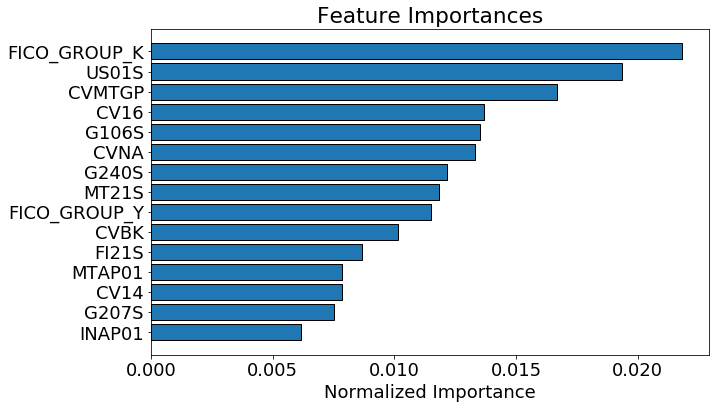

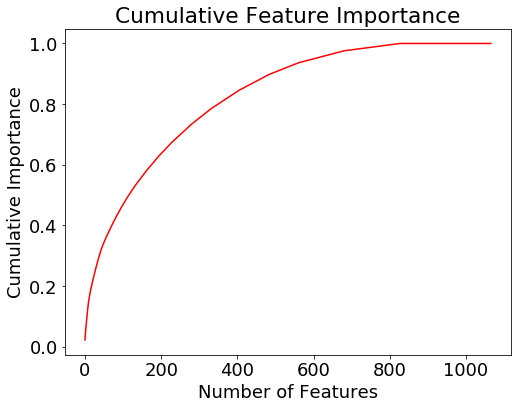

489 features required for 0.90 of cumulative importance


In [39]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [40]:
X_train = X_train.drop(columns = zero_features)
X_test = X_test.drop(columns = zero_features)
#y_train = y_over

print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

Training shape:  (279221, 826)
Testing shape:  (119667, 826)


In [56]:
# At this point, we can re-run the model to see if it identifies any more features with zero importance.

def identify_zero_importance_features(train, train_labels, iterations = 2):
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'auc', verbose = 200)
        
        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [57]:
second_round_zero_features, feature_importances = identify_zero_importance_features(X_train, y_train)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.598139
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.598139

There are 0 features with 0.0 importance


In [41]:
# Threshold for cumulative importance
threshold = 12.0

# Extract the features to keep
#features_to_keep = list(norm_feature_importances[norm_feature_importances['importance'] > threshold]['feature'])
features_to_keep = list(norm_feature_importances['feature'][:30])

# Create new datasets with smaller features
train_small = X_train[features_to_keep]
test_small = X_test[features_to_keep]

In [42]:
print(train_small.shape)
print(test_small.shape)

(279221, 30)
(119667, 30)


In [60]:
train_small.to_csv('train_small.csv', index = False)
test_small.to_csv('test_small.csv', index = False)

## Model Light Boost

In [69]:
# lgb.Dataset defines the training and validation dataset
# this is a little bit confusing, but in lgb.Dataset, "label" means y(the target variable), 
# because our prediction is actually "labelling" the target
# We also define the feature names for feature importance plotting afterwards
xgtrain = lgb.Dataset(X_train, label=y_train, feature_name=predictors)                          
xgvalid = lgb.Dataset(X_test, label=y_test, feature_name=predictors)

In [70]:
lgb_params = {
        'boosting_type': 'gbdt', # Gradient Boosted Decision Trees
        'objective': 'binary', # Because we are predicting 0 and 1
        'metric': 'auc', # Method to evaluate the model, auc means "area under the curve". The lower the better
        'learning_rate': 0.03, #Basically the weight for each boosting iteration. A smaller learning_rate may increase accuracy but lead to slower training speed. 
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit. Too deep may lead to overfitting. 
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8, # Number of threads using for training models, better to set it large for large dataset
        'verbose': 0, # Do not affect training, just affect how detailed the information produced during training would be
        'random_state': 42

    }

In [57]:
model = lgb.LGBMClassifier(**lgb_params)
model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.3, learning_rate=0.03, max_bin=255,
               metric='auc', min_child_weight=5, min_split_gain=0, nthread=8,
               objective='binary', random_state=42, reg_alpha=0, reg_lambda=0,
               subsample=0.6, verbose=0)

In [82]:
preds = model.predict_proba(X_test)[:, 1]

In [80]:
# List feature importance for all features
#print("Features importance...")
#gain = model_lgb.feature_importance('gain')
#ft = pd.DataFrame({'feature':model_lgb.feature_name(), 
                   #'split':model_lgb.feature_importance('split'), 
                   #'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
#print(ft)

In [81]:
# Plot feature importance using the "split" method
#split = lgb.plot_importance(model_lgb, importance_type="split")
#plt.show(split) # Show the plot
#plt.savefig("feature_importance_split.png") # Save the plot in the output

In [43]:
del model

In [44]:
model = lgb.LGBMClassifier(n_estimators=300, objective = 'binary', boosting_type='goss',
                                   learning_rate = 0.05, depth=10,
                                   reg_alpha = 0.1, reg_lambda = 0.1, n_jobs = -1, random_state = 42)

In [45]:
start = time.time()

model.fit(X_train, y_train, eval_metric = 'auc',
         verbose = 200)

end = time.time()
print("total time:",end-start)

total time: 302.4475519657135


In [46]:
from sklearn.metrics import confusion_matrix

preds = model.predict_proba(X_test)[:, 1]
preds_int = np.round(preds)
confusion_matrix(y_test, preds_int)

array([[115614,    321],
       [  2992,    740]])

In [47]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.metrics import roc_auc_score

p_crit = 0.5

y_pred = np.zeros(len(preds),dtype=int)
y_pred[preds < p_crit] = 0
y_pred[preds >= p_crit] = 1

#print(y_test)
#print(y_pred) # the predicted classification labels
print('AUC Score', roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1',fbeta_score(y_test,y_pred,1))
print('naive percentage',sum(y_test)/y_test.shape[0])

AUC Score 0.9157960666598532
accuracy 0.9723148403486341
recall 0.1982851018220793
precision 0.6974552309142319
f1 0.30878364281243487
naive percentage 0.03118654265587004


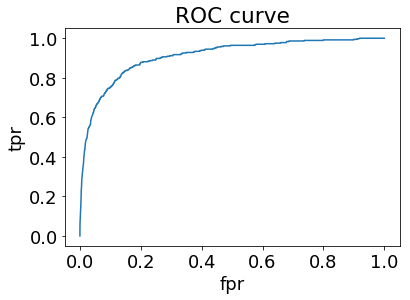

In [48]:
fpr = np.zeros(len(y_test[::10]))
tpr = np.zeros(len(y_test[::10]))

p_crits = np.sort(preds[::10]) # the sorted predicted probabilities serve as critical probabilities

for i in range(len(p_crits[::10])):
    p_crit = p_crits[::10][i]
    
    y_pred = np.zeros(len(y_test[::10]))
    y_pred[preds[::10] < p_crit] = 0
    y_pred[preds[::10] >= p_crit] = 1
    
    C = confusion_matrix(y_test[::10],y_pred) 
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])
    
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

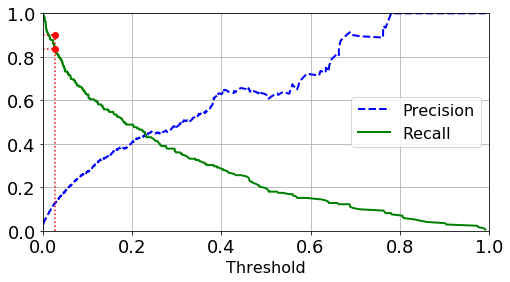

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([0, 1, 0, 1])             # Not shown

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

p,r,p_crits = precision_recall_curve(y_test[::20],preds[::20])


recall_90_precision = r[np.argmax(p >= 0.13)]
threshold_90_precision = p_crits[np.argmax(p >= 0.13)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(p, r, p_crits)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([0, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([0, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

## Small dataset

In [50]:
model = lgb.LGBMClassifier(n_estimators=100, objective = 'binary', boosting_type='goss',
                                   learning_rate = 0.05, depth=10,
                                   reg_alpha = 0.1, reg_lambda = 0.1, n_jobs = -1, random_state = 42)

In [51]:
start = time.time()

model.fit(train_small, y_train, eval_metric = 'auc',
         verbose = 200)

end = time.time()
print("total time:",end-start)

total time: 7.774390935897827


In [52]:
from sklearn.metrics import confusion_matrix

preds_small = model.predict_proba(test_small)[:, 1]

preds_small_int = np.round(preds_small)
confusion_matrix(y_test, preds_small_int)

array([[115676,    259],
       [  3190,    542]])

In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.metrics import roc_auc_score

p_crit = 0.5

y_pred = np.zeros(len(preds_small),dtype=int)
y_pred[preds_small < p_crit] = 0
y_pred[preds_small >= p_crit] = 1

#print(y_test)
#print(y_pred) # the predicted classification labels
print('AUC Score', roc_auc_score(y_test, preds_small))
print('accuracy',accuracy_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1',fbeta_score(y_test,y_pred,1))


AUC Score 0.8983852186734157
accuracy 0.9711783532636399
recall 0.1452304394426581
precision 0.6766541822721598
f1 0.23913523053165672


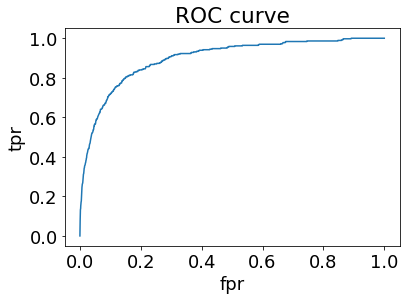

In [54]:
fpr = np.zeros(len(y_test[::10]))
tpr = np.zeros(len(y_test[::10]))

p_crits = np.sort(preds_small[::10]) # the sorted predicted probabilities serve as critical probabilities

for i in range(len(p_crits[::10])):
    p_crit = p_crits[::10][i]
    
    y_pred = np.zeros(len(y_test[::10]))
    y_pred[preds_small[::10] < p_crit] = 0
    y_pred[preds_small[::10] >= p_crit] = 1
    
    C = confusion_matrix(y_test[::10],y_pred) 
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])
    
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

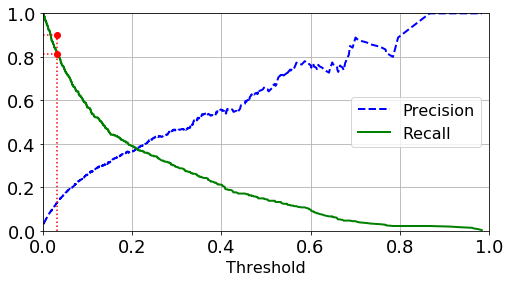

In [55]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([0, 1, 0, 1])             # Not shown

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

p,r,p_crits = precision_recall_curve(y_test[::10],preds_small[::10])


recall_90_precision = r[np.argmax(p >= 0.13)]
threshold_90_precision = p_crits[np.argmax(p >= 0.13)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(p, r, p_crits)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([0, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([0, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

## Catboost

In [56]:
from catboost import CatBoostClassifier
import timeit

model_Cat = CatBoostClassifier(iterations=100, learning_rate=0.05, depth=6, 
                               eval_metric='AUC', 
                               random_seed=42, verbose=200,early_stopping_rounds=200)

In [57]:
start = time.time()

model_Cat.fit(train_small, y_train)

end = time.time()
print("total time:",end-start)

0:	total: 237ms	remaining: 23.4s
99:	total: 12.1s	remaining: 0us
total time: 12.94526219367981


In [58]:
from sklearn.metrics import confusion_matrix

preds = model_Cat.predict_proba(test_small)[:, 1]
preds_int = np.round(preds)
confusion_matrix(y_test, preds_int)

array([[115752,    183],
       [  3276,    456]])

In [59]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

p_crit = 0.5

y_pred = np.zeros(len(preds),dtype=int)
y_pred[preds < p_crit] = 0
y_pred[preds >= p_crit] = 1

#print(y_test)
#print(y_pred) # the predicted classification labels
print('AUC score',roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1',fbeta_score(y_test,y_pred,1))
print('naive percentage',sum(y_test)/y_test.shape[0])

AUC score 0.8892269830393837
accuracy 0.9710947880368022
recall 0.12218649517684887
precision 0.7136150234741784
f1 0.20864790665751545
naive percentage 0.03118654265587004


## XG Boost

In [60]:
import xgboost as xgb

In [289]:
model_XG = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, depth=6, 
                               eval_metric='auc', 
                               random_seed=42, verbose=200,early_stopping_rounds=200)

In [290]:
start = time.time()

model_XG.fit(train_small, y_train)

end = time.time()
print("total time:",end-start)

total time: 157.67001128196716


In [291]:
from sklearn.metrics import confusion_matrix

preds = model_XG.predict_proba(test_small)[:, 1]
preds_int = np.round(preds)
confusion_matrix(y_test, preds_int)

array([[115822,    113],
       [  3408,    324]])

In [64]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

p_crit = 0.5

y_pred = np.zeros(len(preds),dtype=int)
y_pred[preds < p_crit] = 0
y_pred[preds >= p_crit] = 1

#print(y_test)
#print(y_pred) # the predicted classification labels
print('AUC score',roc_auc_score(y_test, preds))
print('accuracy',accuracy_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1',fbeta_score(y_test,y_pred,1))
print('naive percentage',sum(y_test)/y_test.shape[0])

AUC score 0.880219414397255
accuracy 0.9705766836304077
recall 0.08681672025723473
precision 0.7414187643020596
f1 0.1554329575437755
naive percentage 0.03118654265587004


## Tuning Light Boost on Small Dataset

In [323]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

start = time.time()

lg = lgb.LGBMClassifier(silent=False)
param_dist = {
            #"max_depth": [10,25, 50],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [100]
             }

grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train_small, y_train)
print(grid_search.best_estimator_)

end = time.time()
print("total time:",end-start)

#d_train = lgb.Dataset(train_small, label=y_train)
#params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
#model2 = lgb.train(params, d_train)
#auc2(model2, train, test)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 39.7min finished


total time: 2483.522845029831


In [324]:
grid_search.best_estimator_

LGBMClassifier(max_depth=10, n_estimators=200, num_leaves=300, silent=False)

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc

    

def ML_pipeline_kfold_GridSearchCV(X,y,random_state):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state)
    
    lg = lgb.LGBMClassifier()
    param_dist = {
              "max_depth": [6],
              "learning_rate" : [0.05],
              "num_leaves": [100],
              "n_estimators": [100],
               "objective": ['binary'],  
               "boosting_type":['goss'],
               "reg_alpha": [0,0.1,0.2,0.3],
               "reg_lambda": [0.0,0.1,0.2,0.3],
               "n_jobs": [-1],
             }

    # prepare gridsearch
    grid = GridSearchCV(lg, param_grid=param_dist, scoring = 'roc_auc', cv=3)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [74]:
start = time.time()
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(train_small,y_train,i*50)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

end = time.time()
print("total time:",end-start)

{'boosting_type': 'goss', 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 100, 'objective': 'binary', 'reg_alpha': 0, 'reg_lambda': 0.1}
best CV score: 0.8950010597588659
test score: 0.9029314159421872
{'boosting_type': 'goss', 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 100, 'objective': 'binary', 'reg_alpha': 0.2, 'reg_lambda': 0.1}
best CV score: 0.8983244531055955
test score: 0.8967454536376634
{'boosting_type': 'goss', 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 100, 'objective': 'binary', 'reg_alpha': 0, 'reg_lambda': 0.1}
best CV score: 0.8983315837948753
test score: 0.8939717803180588
{'boosting_type': 'goss', 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 100, 'objective': 'binary', 'reg_alpha': 0.2, 'reg_lambda': 0.1}
best CV score: 0.8977403744402079
test score: 0.8988987821857234
{'boosting_type': 'goss', 'l

## Tuning Result

In [78]:
params = {
              "max_depth": [6],
              "learning_rate" : [0.05],
              "num_leaves": [100],
              "n_estimators": [100],
               "objective": ['binary'],  
               "boosting_type":['goss'],
               "reg_alpha": [0.1],
               "reg_lambda": [0.1],
               "n_jobs": [-1],
               "random_state" : [42]
             }


model_tune = lgb.LGBMClassifier(params=params)
#model_tune = lgb.LGBMClassifier(n_estimators=500, objective = 'binary', boosting_type='goss',
                                   #learning_rate = 0.05, depth=20, num_leaves=300,
                                   #reg_alpha = 0.1, reg_lambda = 0.1, n_jobs = -1, random_state = 42)

In [85]:
start = time.time()

model_tune.fit(train_small, y_train, eval_metric = 'auc',
         verbose = 200)

end = time.time()
print("total time:",end-start)

total time: 184.15730023384094


In [86]:
from sklearn.metrics import confusion_matrix

preds_small = model_tune.predict_proba(test_small)[:, 1]

preds_small_int = np.round(preds_small)
confusion_matrix(y_test, preds_small_int)

array([[115738,    197],
       [  2768,    964]])

In [87]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.metrics import roc_auc_score

p_crit = 0.5

y_pred = np.zeros(len(preds_small),dtype=int)
y_pred[preds_small < p_crit] = 0
y_pred[preds_small >= p_crit] = 1

#print(y_test)
#print(y_pred) # the predicted classification labels
print('AUC Score', roc_auc_score(y_test, preds_small))
print('accuracy',accuracy_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1',fbeta_score(y_test,y_pred,1))

AUC Score 0.9132089078539454
accuracy 0.9752229102425899
recall 0.2583065380493033
precision 0.830318690783807
f1 0.39403229102799914


## Convert your Boost model into if-else format

In [368]:
def string_parser(s):
    if len(re.findall(r":leaf=", s)) == 0:
        out  = re.findall(r"[\w.-]+", s)
        tabs = re.findall(r"[\t]+", s)
        if (out[4] == out[8]):
            missing_value_handling = (" or np.isnan(x['" + out[1] + "']) ")
        else:
            missing_value_handling = ""
            
        if len(tabs) > 0:
            return (re.findall(r"[\t]+", s)[0].replace('\t', '    ') + 
                    '        if state == ' + out[0] + ':\n' +
                    re.findall(r"[\t]+", s)[0].replace('\t', '    ') +
                    '            state = (' + out[4] +  
                    ' if ' +  "x['" + out[1] +"']<" + out[2] + missing_value_handling + 
                    ' else ' + out[6] + ')\n' )
        
        else:
            return ('        if state == ' + out[0] + ':\n' +
                    '            state = (' + out[4] +  
                    ' if ' +  "x['" + out[1] +"']<" + out[2] + missing_value_handling +
                    ' else ' + out[6] + ')\n' )
    else:
        out = re.findall(r"[\d.-]+", s)
        return (re.findall(r"[\t]+", s)[0].replace('\t', '    ') + 
                '        if state == ' + out[0] + ':\n    ' +
                re.findall(r"[\t]+", s)[0].replace('\t', '    ') + 
                '        return ' + out[1] + '\n')

In [369]:
#get_booster().
def tree_parser(tree, i):
    if i == 0:
        return ('    if num_booster == 0:\n        state = 0\n'
             + "".join([string_parser(tree.split('\n')[i]) for i in range(len(tree.split('\n'))-1)]))
    else:
        return ('    elif num_booster == '+str(i)+':\n        state = 0\n'
             + "".join([string_parser(tree.split('\n')[i]) for i in range(len(tree.split('\n'))-1)])) 
    
def model_to_py(base_score, model, out_file):
    trees = model.get_dump()
    result = ["import numpy as np\n\n" 
             +"def xgb_tree(x, num_booster):\n"]
    
    for i in range(len(trees)):
        result.append(tree_parser(trees[i], i))
    
    with open(out_file, 'a') as the_file:
        the_file.write("".join(result) + "\ndef xgb_predict(x):\n    predict = " + str(base_score) + "\n"
                 + "# initialize prediction with base score\n" 
                 + "    for i in range(" 
                 + str(len(trees))  
                 + "):\n        predict = predict + xgb_tree(x, i)"
                 + "\n    return predict")

In [422]:
params = {
          'base_score': np.mean(y_train),
          'eta':  0.1,
          'max_depth': 6,
          'gamma' :3,
          'objective'   :'reg:linear',
          'eval_metric' :'mae',
          "random_state" : 42
         }

d_train = xgb.DMatrix(train_small, label=y_train)

model3 = xgb.train(params=params, 
                  dtrain=d_train, 
                  num_boost_round=20)

[13:49:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [423]:
model_to_py(np.mean(y_train), model3, 'xgb_model.py')

In [424]:
import numpy as np

def xgb_tree(x, num_booster):
    if num_booster == 0:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<6 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV14']<3 or np.isnan(x['CV14'])  else 14)
                        if state == 13:
                            state = (25 if x['US01S']<0.5 or np.isnan(x['US01S'])  else 26)
                            if state == 25:
                                return -0.00258778525
                            if state == 26:
                                return -0.00158439321
                        if state == 14:
                            state = (27 if x['CVNA']<643.5 else 28)
                            if state == 27:
                                state = (51 if x['CV16']<0.5 else 52)
                                if state == 51:
                                    return 0.000215823224
                                if state == 52:
                                    return 0.00373047078
                            if state == 28:
                                state = (53 if x['CVMTGP']<592.5 else 54)
                                if state == 53:
                                    return -0.00148360792
                                if state == 54:
                                    return 0.000724406389
                    if state == 8:
                        state = (15 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 16)
                        if state == 15:
                            state = (29 if x['G102S']<21.5 else 30)
                            if state == 29:
                                state = (55 if x['MTAP01']<849.5 or np.isnan(x['MTAP01'])  else 56)
                                if state == 55:
                                    return 0.010131537
                                if state == 56:
                                    return 0.00331273279
                            if state == 30:
                                return -0.0011609029
                        if state == 16:
                            state = (31 if x['RLE906']<848954.5 else 32)
                            if state == 31:
                                state = (59 if x['CVNA']<624.5 else 60)
                                if state == 59:
                                    return 0.0205081552
                                if state == 60:
                                    return 0.00873128418
                            if state == 32:
                                state = (61 if x['G207S']<80.5 else 62)
                                if state == 61:
                                    return 0.00973235536
                                if state == 62:
                                    return 0.0361326151
                if state == 4:
                    return 0.0964933187
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<8.5 else 10)
                    if state == 9:
                        state = (17 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 18)
                        if state == 17:
                            state = (33 if x['CVMTGP']<649.5 else 34)
                            if state == 33:
                                state = (63 if x['BC102S']<1461 else 64)
                                if state == 63:
                                    return 0.0103782015
                                if state == 64:
                                    return 0.00228719949
                            if state == 34:
                                state = (65 if x['CVNA']<633.5 else 66)
                                if state == 65:
                                    return 0.0177318361
                                if state == 66:
                                    return 0.0072259414
                        if state == 18:
                            return 0.0939691439
                    if state == 10:
                        state = (19 if x['CV14']<12 or np.isnan(x['CV14'])  else 20)
                        if state == 19:
                            state = (35 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 36)
                            if state == 35:
                                state = (67 if x['MT21S']<209 or np.isnan(x['MT21S'])  else 68)
                                if state == 67:
                                    return 0.0203115605
                                if state == 68:
                                    return 0.0861383826
                            if state == 36:
                                return 0.0872151181
                        if state == 20:
                            state = (37 if x['G106S']<334.5 or np.isnan(x['G106S'])  else 38)
                            if state == 37:
                                state = (69 if x['G208S']<40 or np.isnan(x['G208S'])  else 70)
                                if state == 69:
                                    return 0.0581027456
                                if state == 70:
                                    return 0.0171806104
                            if state == 38:
                                return 0.0509736724
                if state == 6:
                    state = (11 if x['CV16']<1.5 else 12)
                    if state == 11:
                        state = (21 if x['FI21S']<6.5 else 22)
                        if state == 21:
                            state = (39 if x['BC102S']<1361 or np.isnan(x['BC102S'])  else 40)
                            if state == 39:
                                state = (73 if x['US01S']<0.5 else 74)
                                if state == 73:
                                    return 0.0307747126
                                if state == 74:
                                    return 0.0596385486
                            if state == 40:
                                return 0.0240741875
                        if state == 22:
                            state = (41 if x['MTAP01']<877.5 or np.isnan(x['MTAP01'])  else 42)
                            if state == 41:
                                state = (77 if x['BC102S']<1116 else 78)
                                if state == 77:
                                    return 0.0416741557
                                if state == 78:
                                    return 0.0224045422
                            if state == 42:
                                return 0.0110392636
                    if state == 12:
                        state = (23 if x['MT21S']<106.5 else 24)
                        if state == 23:
                            state = (43 if x['BC102S']<3084.5 or np.isnan(x['BC102S'])  else 44)
                            if state == 43:
                                state = (81 if x['US01S']<1.5 else 82)
                                if state == 81:
                                    return 0.034706369
                                if state == 82:
                                    return 0.0527276285
                            if state == 44:
                                state = (83 if x['CVBK']<564.5 else 84)
                                if state == 83:
                                    return 0.0375990234
                                if state == 84:
                                    return 0.0144372834
                        if state == 24:
                            state = (45 if x['CVNA']<626.5 else 46)
                            if state == 45:
                                return 0.0675601438
                            if state == 46:
                                state = (87 if x['CVBK']<615.5 else 88)
                                if state == 87:
                                    return 0.0502988957
                                if state == 88:
                                    return 0.00902945083
    elif num_booster == 1:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<6 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV14']<3 or np.isnan(x['CV14'])  else 14)
                        if state == 13:
                            state = (25 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 26)
                            if state == 25:
                                return -0.00228085229
                            if state == 26:
                                return -0.00114663283
                        if state == 14:
                            state = (27 if x['CVNA']<641.5 else 28)
                            if state == 27:
                                state = (51 if x['FI21S']<3.5 else 52)
                                if state == 51:
                                    return 0.00767852878
                                if state == 52:
                                    return 0.00144221867
                            if state == 28:
                                state = (53 if x['CVMTGP']<592.5 else 54)
                                if state == 53:
                                    return -0.00129840942
                                if state == 54:
                                    return 0.000667014043
                    if state == 8:
                        state = (15 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 16)
                        if state == 15:
                            state = (29 if x['CV14']<2 or np.isnan(x['CV14'])  else 30)
                            if state == 29:
                                state = (55 if x['CV16']<9.99999997e-07 else 56)
                                if state == 55:
                                    return 0.00278035272
                                if state == 56:
                                    return -0.00122162828
                            if state == 30:
                                state = (57 if x['CVNA']<596.5 else 58)
                                if state == 57:
                                    return 0.0156727899
                                if state == 58:
                                    return 0.00550801354
                        if state == 16:
                            state = (31 if x['RLE906']<2.5 or np.isnan(x['RLE906'])  else 32)
                            if state == 31:
                                state = (59 if x['BC102S']<1456.5 or np.isnan(x['BC102S'])  else 60)
                                if state == 59:
                                    return 0.0306942351
                                if state == 60:
                                    return 0.0170892514
                            if state == 32:
                                state = (61 if x['CV14']<4 or np.isnan(x['CV14'])  else 62)
                                if state == 61:
                                    return 0.00648637349
                                if state == 62:
                                    return 0.0176887978
                if state == 4:
                    return 0.0868850499
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<10.5 else 10)
                    if state == 9:
                        state = (17 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 18)
                        if state == 17:
                            state = (33 if x['CV16']<3.5 else 34)
                            if state == 33:
                                state = (63 if x['CVNA']<644.5 else 64)
                                if state == 63:
                                    return 0.00727365306
                                if state == 64:
                                    return 0.00165155157
                            if state == 34:
                                state = (65 if x['CVNA']<649.5 else 66)
                                if state == 65:
                                    return 0.0190136302
                                if state == 66:
                                    return 0.00742045371
                        if state == 18:
                            return 0.0853901431
                    if state == 10:
                        state = (19 if x['FI21S']<14.5 else 20)
                        if state == 19:
                            return 0.049007304
                        if state == 20:
                            state = (37 if x['BC102S']<6975 else 38)
                            if state == 37:
                                return 0.0193286072
                            if state == 38:
                                return 0.0401842594
                if state == 6:
                    state = (11 if x['CV16']<1.5 else 12)
                    if state == 11:
                        state = (21 if x['FI21S']<9.5 else 22)
                        if state == 21:
                            state = (39 if x['BC102S']<1554 or np.isnan(x['BC102S'])  else 40)
                            if state == 39:
                                state = (75 if x['US01S']<0.5 else 76)
                                if state == 75:
                                    return 0.0255305711
                                if state == 76:
                                    return 0.0497747175
                            if state == 40:
                                return 0.0202160515
                        if state == 22:
                            state = (41 if x['MTAP01']<836 or np.isnan(x['MTAP01'])  else 42)
                            if state == 41:
                                state = (79 if x['BC102S']<460 else 80)
                                if state == 79:
                                    return 0.0571968742
                                if state == 80:
                                    return 0.0217452496
                            if state == 42:
                                return 0.00829465874
                    if state == 12:
                        state = (23 if x['MT21S']<106.5 else 24)
                        if state == 23:
                            state = (43 if x['BC102S']<1376 or np.isnan(x['BC102S'])  else 44)
                            if state == 43:
                                state = (83 if x['US01S']<1.5 else 84)
                                if state == 83:
                                    return 0.0321325585
                                if state == 84:
                                    return 0.05882309
                            if state == 44:
                                state = (85 if x['CVBK']<564.5 else 86)
                                if state == 85:
                                    return 0.0392110199
                                if state == 86:
                                    return 0.0198995229
                        if state == 24:
                            state = (45 if x['CVNA']<625.5 else 46)
                            if state == 45:
                                return 0.0609553345
                            if state == 46:
                                return 0.0408265181
    elif num_booster == 2:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<7 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV14']<4 or np.isnan(x['CV14'])  else 14)
                        if state == 13:
                            state = (25 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 26)
                            if state == 25:
                                return -0.0020015731
                            if state == 26:
                                state = (51 if x['MT21S']<90.5 else 52)
                                if state == 51:
                                    return -0.00130782346
                                if state == 52:
                                    return 0.000825561758
                        if state == 14:
                            state = (27 if x['MT21S']<118.5 else 28)
                            if state == 27:
                                state = (53 if x['US01S']<1.5 else 54)
                                if state == 53:
                                    return -0.00060183648
                                if state == 54:
                                    return 0.00227045058
                            if state == 28:
                                state = (55 if x['G240S']<1.5 else 56)
                                if state == 55:
                                    return 0.00138075079
                                if state == 56:
                                    return 0.00899095833
                    if state == 8:
                        state = (15 if x['CV14']<3 or np.isnan(x['CV14'])  else 16)
                        if state == 15:
                            state = (29 if x['G102S']<21.5 else 30)
                            if state == 29:
                                state = (57 if x['CVNA']<595.5 else 58)
                                if state == 57:
                                    return 0.010676411
                                if state == 58:
                                    return 0.00322890142
                            if state == 30:
                                return -0.000913942524
                        if state == 16:
                            state = (31 if x['CVMTGP']<678.5 else 32)
                            if state == 31:
                                state = (61 if x['MTAP01']<886.5 or np.isnan(x['MTAP01'])  else 62)
                                if state == 61:
                                    return 0.0183375776
                                if state == 62:
                                    return 0.00707252417
                            if state == 32:
                                state = (63 if x['BC102S']<1024 or np.isnan(x['BC102S'])  else 64)
                                if state == 63:
                                    return 0.0418978371
                                if state == 64:
                                    return 0.0221183933
                if state == 4:
                    return 0.0782939047
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<8.5 else 10)
                    if state == 9:
                        state = (17 if x['FI21S']<10.5 else 18)
                        if state == 17:
                            state = (33 if x['BC102S']<2076.5 or np.isnan(x['BC102S'])  else 34)
                            if state == 33:
                                state = (65 if x['MT21S']<97.5 else 66)
                                if state == 65:
                                    return 0.0114650512
                                if state == 66:
                                    return 0.0244618077
                            if state == 34:
                                state = (67 if x['CVMTGP']<635.5 else 68)
                                if state == 67:
                                    return 0.00346865505
                                if state == 68:
                                    return 0.011342057
                        if state == 18:
                            state = (35 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 36)
                            if state == 35:
                                state = (69 if x['G240S']<2.5 else 70)
                                if state == 69:
                                    return 0.00137363689
                                if state == 70:
                                    return 0.00680386042
                            if state == 36:
                                return 0.0723889396
                    if state == 10:
                        state = (19 if x['FI21S']<14.5 else 20)
                        if state == 19:
                            state = (37 if x['MTAP01']<1150.5 else 38)
                            if state == 37:
                                return 0.0584296249
                            if state == 38:
                                return 0.0309516583
                        if state == 20:
                            state = (39 if x['CV16']<8.5 else 40)
                            if state == 39:
                                state = (75 if x['RLE906']<2129.5 or np.isnan(x['RLE906'])  else 76)
                                if state == 75:
                                    return 0.0253900569
                                if state == 76:
                                    return 0.00524083804
                            if state == 40:
                                return 0.033936765
                if state == 6:
                    state = (11 if x['BC102S']<1371 or np.isnan(x['BC102S'])  else 12)
                    if state == 11:
                        state = (21 if x['CV16']<0.5 else 22)
                        if state == 21:
                            state = (41 if x['FI21S']<11.5 else 42)
                            if state == 41:
                                state = (79 if x['BALMAG01']<181 else 80)
                                if state == 79:
                                    return 0.00976578891
                                if state == 80:
                                    return 0.0449107401
                            if state == 42:
                                return 0.0127862692
                        if state == 22:
                            state = (43 if x['MTAP01']<1140.5 or np.isnan(x['MTAP01'])  else 44)
                            if state == 43:
                                state = (83 if x['US01S']<1.5 else 84)
                                if state == 83:
                                    return 0.0440717563
                                if state == 84:
                                    return 0.0616703406
                            if state == 44:
                                return 0.0337111317
                    if state == 12:
                        state = (23 if x['CV14']<10 or np.isnan(x['CV14'])  else 24)
                        if state == 23:
                            state = (45 if x['CV16']<0.5 else 46)
                            if state == 45:
                                return 0.00473398482
                            if state == 46:
                                state = (89 if x['MT21S']<89.5 else 90)
                                if state == 89:
                                    return 0.0156474188
                                if state == 90:
                                    return 0.0321751647
                        if state == 24:
                            state = (47 if x['MT21S']<105 or np.isnan(x['MT21S'])  else 48)
                            if state == 47:
                                return 0.0280117244
                            if state == 48:
                                return 0.0454936251
    elif num_booster == 3:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<6 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 14)
                        if state == 13:
                            state = (25 if x['US01S']<0.5 or np.isnan(x['US01S'])  else 26)
                            if state == 25:
                                return -0.00201479252
                            if state == 26:
                                state = (49 if x['FI21S']<18.5 else 50)
                                if state == 49:
                                    return 0.000164849611
                                if state == 50:
                                    return -0.00157136505
                        if state == 14:
                            state = (27 if x['CVBK']<613.5 else 28)
                            if state == 27:
                                state = (51 if x['MT21S']<122.5 else 52)
                                if state == 51:
                                    return 0.000352840143
                                if state == 52:
                                    return 0.00486169057
                            if state == 28:
                                return -0.00113931752
                    if state == 8:
                        state = (15 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 16)
                        if state == 15:
                            state = (29 if x['FI21S']<16.5 else 30)
                            if state == 29:
                                state = (55 if x['CVNA']<595.5 else 56)
                                if state == 55:
                                    return 0.0193391256
                                if state == 56:
                                    return 0.00642052526
                            if state == 30:
                                state = (57 if x['BC102S']<994 else 58)
                                if state == 57:
                                    return 0.00637360523
                                if state == 58:
                                    return 0.000152344102
                        if state == 16:
                            state = (31 if x['MT21S']<121.5 else 32)
                            if state == 31:
                                state = (59 if x['MTAP01']<1158.5 or np.isnan(x['MTAP01'])  else 60)
                                if state == 59:
                                    return 0.0146577386
                                if state == 60:
                                    return 0.00424750615
                            if state == 32:
                                state = (61 if x['G102S']<3.5 else 62)
                                if state == 61:
                                    return 0.0322840847
                                if state == 62:
                                    return 0.0151578924
                if state == 4:
                    return 0.0704374313
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['CV16']<4.5 else 10)
                    if state == 9:
                        state = (17 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 18)
                        if state == 17:
                            state = (33 if x['CVNA']<642.5 else 34)
                            if state == 33:
                                state = (63 if x['G240S']<1.5 else 64)
                                if state == 63:
                                    return 0.003601084
                                if state == 64:
                                    return 0.0111518549
                            if state == 34:
                                state = (65 if x['US01S']<1.5 else 66)
                                if state == 65:
                                    return 0.000181046431
                                if state == 66:
                                    return 0.00436405418
                        if state == 18:
                            return 0.0694001094
                    if state == 10:
                        state = (19 if x['G240S']<10.5 else 20)
                        if state == 19:
                            state = (35 if x['CVNA']<628.5 else 36)
                            if state == 35:
                                state = (67 if x['CVMTGP']<704.5 else 68)
                                if state == 67:
                                    return 0.0109219579
                                if state == 68:
                                    return 0.0337290354
                            if state == 36:
                                state = (69 if x['G106S']<389.5 or np.isnan(x['G106S'])  else 70)
                                if state == 69:
                                    return 0.00563218072
                                if state == 70:
                                    return 0.0171433613
                        if state == 20:
                            state = (37 if x['FI21S']<13.5 else 38)
                            if state == 37:
                                state = (71 if x['G102S']<1.5 else 72)
                                if state == 71:
                                    return 0.0498055555
                                if state == 72:
                                    return 0.0188052561
                            if state == 38:
                                state = (73 if x['BC102S']<6975 else 74)
                                if state == 73:
                                    return 0.0150474729
                                if state == 74:
                                    return 0.0363251306
                if state == 6:
                    state = (11 if x['CVMTGP']<669.5 else 12)
                    if state == 11:
                        state = (21 if x['MTAP01']<886.5 or np.isnan(x['MTAP01'])  else 22)
                        if state == 21:
                            state = (39 if x['BC102S']<1029 else 40)
                            if state == 39:
                                state = (75 if x['BC21S']<10.5 else 76)
                                if state == 75:
                                    return 0.0454827957
                                if state == 76:
                                    return 0.0215349328
                            if state == 40:
                                state = (77 if x['G102S']<4.5 else 78)
                                if state == 77:
                                    return 0.027013341
                                if state == 78:
                                    return 0.0093562454
                        if state == 22:
                            state = (41 if x['FI21S']<9.5 else 42)
                            if state == 41:
                                state = (79 if x['JT20S']<143.5 or np.isnan(x['JT20S'])  else 80)
                                if state == 79:
                                    return 0.0263320748
                                if state == 80:
                                    return 0.00767557463
                            if state == 42:
                                return 0.00791548006
                    if state == 12:
                        state = (23 if x['BC102S']<1358.5 or np.isnan(x['BC102S'])  else 24)
                        if state == 23:
                            state = (43 if x['MT21S']<121.5 else 44)
                            if state == 43:
                                state = (83 if x['US01S']<1.5 else 84)
                                if state == 83:
                                    return 0.0306229647
                                if state == 84:
                                    return 0.0502859168
                            if state == 44:
                                return 0.0566668212
                        if state == 24:
                            state = (45 if x['CV14']<13 or np.isnan(x['CV14'])  else 46)
                            if state == 45:
                                state = (87 if x['CVNA']<630.5 else 88)
                                if state == 87:
                                    return 0.0316234492
                                if state == 88:
                                    return 0.0143285533
                            if state == 46:
                                return 0.0472952947
    elif num_booster == 4:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<8 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV14']<4 or np.isnan(x['CV14'])  else 14)
                        if state == 13:
                            state = (25 if x['US01S']<0.5 or np.isnan(x['US01S'])  else 26)
                            if state == 25:
                                return -0.00169770571
                            if state == 26:
                                state = (51 if x['FI21S']<9.5 else 52)
                                if state == 51:
                                    return 0.0011392656
                                if state == 52:
                                    return -0.00103010831
                        if state == 14:
                            state = (27 if x['CVMTGP']<634.5 else 28)
                            if state == 27:
                                state = (53 if x['FI21S']<14.5 else 54)
                                if state == 53:
                                    return 0.00185733382
                                if state == 54:
                                    return -0.000807772507
                            if state == 28:
                                state = (55 if x['MT21S']<124.5 else 56)
                                if state == 55:
                                    return 0.00212867814
                                if state == 56:
                                    return 0.0092278067
                    if state == 8:
                        state = (15 if x['CV14']<4 or np.isnan(x['CV14'])  else 16)
                        if state == 15:
                            state = (29 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 30)
                            if state == 29:
                                state = (57 if x['US01S']<0.5 else 58)
                                if state == 57:
                                    return -0.000237438362
                                if state == 58:
                                    return 0.00415852945
                            if state == 30:
                                state = (59 if x['RLE906']<1493766 else 60)
                                if state == 59:
                                    return 0.00555646885
                                if state == 60:
                                    return 0.02297391
                        if state == 16:
                            state = (31 if x['BC102S']<1656.5 or np.isnan(x['BC102S'])  else 32)
                            if state == 31:
                                state = (61 if x['CVMTGP']<677.5 else 62)
                                if state == 61:
                                    return 0.017278498
                                if state == 62:
                                    return 0.0373187922
                            if state == 32:
                                state = (63 if x['RLE906']<862.5 or np.isnan(x['RLE906'])  else 64)
                                if state == 63:
                                    return 0.0150973592
                                if state == 64:
                                    return 0.00435575983
                if state == 4:
                    return 0.0637143329
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<9.5 else 10)
                    if state == 9:
                        state = (17 if x['BC102S']<1927.5 else 18)
                        if state == 17:
                            state = (33 if x['CVMTGP']<720.5 else 34)
                            if state == 33:
                                state = (65 if x['FI21S']<12.5 else 66)
                                if state == 65:
                                    return 0.0154011473
                                if state == 66:
                                    return 0.00553587358
                            if state == 34:
                                state = (67 if x['CV14']<14 or np.isnan(x['CV14'])  else 68)
                                if state == 67:
                                    return 0.0191164818
                                if state == 68:
                                    return 0.0478801839
                        if state == 18:
                            state = (35 if x['CVMTGP']<725.5 else 36)
                            if state == 35:
                                return 0.00311118574
                            if state == 36:
                                state = (71 if x['MTAP01']<6677 or np.isnan(x['MTAP01'])  else 72)
                                if state == 71:
                                    return 0.00892326515
                                if state == 72:
                                    return 0.0623989664
                    if state == 10:
                        state = (19 if x['CVMTGP']<688.5 else 20)
                        if state == 19:
                            return 0.0128810434
                        if state == 20:
                            state = (39 if x['JT20S']<139 or np.isnan(x['JT20S'])  else 40)
                            if state == 39:
                                return 0.0231583528
                            if state == 40:
                                return 0.0420402698
                if state == 6:
                    state = (11 if x['G240S']<3.5 else 12)
                    if state == 11:
                        state = (21 if x['RLE906']<7 or np.isnan(x['RLE906'])  else 22)
                        if state == 21:
                            state = (41 if x['FI21S']<7.5 else 42)
                            if state == 41:
                                state = (81 if x['CVNA']<609.5 else 82)
                                if state == 81:
                                    return 0.055351533
                                if state == 82:
                                    return 0.0265090317
                            if state == 42:
                                state = (83 if x['G205B']<1561 or np.isnan(x['G205B'])  else 84)
                                if state == 83:
                                    return 0.0277603865
                                if state == 84:
                                    return 0.00560408225
                        if state == 22:
                            state = (43 if x['MTAP01']<2125.5 or np.isnan(x['MTAP01'])  else 44)
                            if state == 43:
                                state = (85 if x['G207S']<3906 else 86)
                                if state == 85:
                                    return 0.00978347566
                                if state == 86:
                                    return 0.026558686
                            if state == 44:
                                return -0.00615801197
                    if state == 12:
                        state = (23 if x['MT21S']<110.5 else 24)
                        if state == 23:
                            state = (45 if x['MTAP01']<1438.5 else 46)
                            if state == 45:
                                state = (89 if x['CVNA']<629.5 else 90)
                                if state == 89:
                                    return 0.0483726077
                                if state == 90:
                                    return 0.0225401353
                            if state == 46:
                                return 0.0228668116
                        if state == 24:
                            return 0.0498104654
    elif num_booster == 5:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<5 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CVMTGP']<578.5 else 14)
                        if state == 13:
                            state = (25 if x['CVNA']<661.5 else 26)
                            if state == 25:
                                state = (47 if x['FI21S']<11.5 else 48)
                                if state == 47:
                                    return 0.00101801893
                                if state == 48:
                                    return -0.00111411314
                            if state == 26:
                                return -0.0017057223
                        if state == 14:
                            state = (27 if x['US01S']<0.5 or np.isnan(x['US01S'])  else 28)
                            if state == 27:
                                return -0.000716467272
                            if state == 28:
                                return 0.00144077733
                    if state == 8:
                        state = (15 if x['CV14']<2 or np.isnan(x['CV14'])  else 16)
                        if state == 15:
                            state = (29 if x['G102S']<22.5 else 30)
                            if state == 29:
                                state = (55 if x['G207S']<16048 or np.isnan(x['G207S'])  else 56)
                                if state == 55:
                                    return 0.00210015615
                                if state == 56:
                                    return 0.0549486764
                            if state == 30:
                                return -0.00110442587
                        if state == 16:
                            state = (31 if x['CVNA']<632.5 else 32)
                            if state == 31:
                                state = (59 if x['US01S']<0.5 else 60)
                                if state == 59:
                                    return 0.00665308163
                                if state == 60:
                                    return 0.016854262
                            if state == 32:
                                state = (61 if x['FI21S']<7.5 else 62)
                                if state == 61:
                                    return 0.0103015117
                                if state == 62:
                                    return 0.000327196409
                if state == 4:
                    return 0.0570591167
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<5.5 else 10)
                    if state == 9:
                        state = (17 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 18)
                        if state == 17:
                            state = (33 if x['FI21S']<9.5 else 34)
                            if state == 33:
                                state = (63 if x['CVNA']<624.5 else 64)
                                if state == 63:
                                    return 0.012350969
                                if state == 64:
                                    return 0.00350951962
                            if state == 34:
                                state = (65 if x['CVNA']<642.5 else 66)
                                if state == 65:
                                    return 0.00278671156
                                if state == 66:
                                    return -6.56432167
                        if state == 18:
                            return 0.0578805581
                    if state == 10:
                        state = (19 if x['CV14']<11 or np.isnan(x['CV14'])  else 20)
                        if state == 19:
                            state = (35 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 36)
                            if state == 35:
                                state = (67 if x['MT21S']<94.5 else 68)
                                if state == 67:
                                    return 0.00600219844
                                if state == 68:
                                    return 0.015695475
                            if state == 36:
                                return 0.062895067
                        if state == 20:
                            state = (37 if x['MT21S']<124.5 or np.isnan(x['MT21S'])  else 38)
                            if state == 37:
                                state = (69 if x['G106S']<364.5 or np.isnan(x['G106S'])  else 70)
                                if state == 69:
                                    return 0.0122070322
                                if state == 70:
                                    return 0.0268693455
                            if state == 38:
                                return 0.0425515249
                if state == 6:
                    state = (11 if x['G240S']<1.5 else 12)
                    if state == 11:
                        state = (21 if x['CVNA']<595.5 else 22)
                        if state == 21:
                            state = (39 if x['FI21S']<70.5 else 40)
                            if state == 39:
                                return 0.0309575889
                            if state == 40:
                                return 0.0101124765
                        if state == 22:
                            state = (41 if x['FI21S']<9.5 else 42)
                            if state == 41:
                                state = (77 if x['US01S']<0.5 else 78)
                                if state == 77:
                                    return 0.0024263605
                                if state == 78:
                                    return 0.0209484957
                            if state == 42:
                                state = (79 if x['MTAP01']<459.5 or np.isnan(x['MTAP01'])  else 80)
                                if state == 79:
                                    return 0.0133043127
                                if state == 80:
                                    return 0.000494114938
                    if state == 12:
                        state = (23 if x['RLE906']<189.5 or np.isnan(x['RLE906'])  else 24)
                        if state == 23:
                            state = (43 if x['G102S']<2.5 else 44)
                            if state == 43:
                                state = (81 if x['CVNA']<609.5 else 82)
                                if state == 81:
                                    return 0.0477263555
                                if state == 82:
                                    return 0.0340088718
                            if state == 44:
                                return 0.024852708
                        if state == 24:
                            state = (45 if x['G240S']<9.5 else 46)
                            if state == 45:
                                state = (85 if x['MTAP01']<1049 else 86)
                                if state == 85:
                                    return 0.0299157854
                                if state == 86:
                                    return 0.0133201247
                            if state == 46:
                                return 0.0425892435
    elif num_booster == 6:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<8 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV16']<1.5 or np.isnan(x['CV16'])  else 14)
                        if state == 13:
                            state = (25 if x['US01S']<1.5 or np.isnan(x['US01S'])  else 26)
                            if state == 25:
                                return -0.00132170564
                            if state == 26:
                                state = (51 if x['FI21S']<18.5 else 52)
                                if state == 51:
                                    return 0.00171283842
                                if state == 52:
                                    return -0.00083438959
                        if state == 14:
                            state = (27 if x['MT21S']<111.5 else 28)
                            if state == 27:
                                state = (53 if x['CVBK']<609.5 else 54)
                                if state == 53:
                                    return 0.00225443672
                                if state == 54:
                                    return -0.000804665033
                            if state == 28:
                                state = (55 if x['CVNA']<667.5 else 56)
                                if state == 55:
                                    return 0.00877957884
                                if state == 56:
                                    return 0.00204041414
                    if state == 8:
                        state = (15 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 16)
                        if state == 15:
                            state = (29 if x['FI21S']<12.5 else 30)
                            if state == 29:
                                state = (57 if x['MTAP01']<1127 or np.isnan(x['MTAP01'])  else 58)
                                if state == 57:
                                    return 0.0110800629
                                if state == 58:
                                    return 0.0012073114
                            if state == 30:
                                state = (59 if x['BC102S']<994 else 60)
                                if state == 59:
                                    return 0.00564627629
                                if state == 60:
                                    return -4.86769532
                        if state == 16:
                            state = (31 if x['MT21S']<121.5 else 32)
                            if state == 31:
                                state = (61 if x['US01S']<1.5 else 62)
                                if state == 61:
                                    return 0.00447080238
                                if state == 62:
                                    return 0.0152123794
                            if state == 32:
                                state = (63 if x['CVNA']<605.5 else 64)
                                if state == 63:
                                    return 0.0294442959
                                if state == 64:
                                    return 0.0141485352
                if state == 4:
                    return 0.0516498387
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<10.5 else 10)
                    if state == 9:
                        state = (17 if x['BC102S']<1467.5 else 18)
                        if state == 17:
                            state = (33 if x['CVBK']<622.5 else 34)
                            if state == 33:
                                state = (65 if x['CV16']<0.5 else 66)
                                if state == 65:
                                    return 0.00655097282
                                if state == 66:
                                    return 0.0202869195
                            if state == 34:
                                return -0.00034085146
                        if state == 18:
                            state = (35 if x['CVMTGP']<725.5 else 36)
                            if state == 35:
                                return 0.00277997158
                            if state == 36:
                                state = (71 if x['MTAP01']<6677 or np.isnan(x['MTAP01'])  else 72)
                                if state == 71:
                                    return 0.0082380306
                                if state == 72:
                                    return 0.0559012368
                    if state == 10:
                        state = (19 if x['MT21S']<2.5 or np.isnan(x['MT21S'])  else 20)
                        if state == 19:
                            return -0.0160249826
                        if state == 20:
                            state = (39 if x['CV14']<18 or np.isnan(x['CV14'])  else 40)
                            if state == 39:
                                state = (73 if x['MTAP01']<3254.5 else 74)
                                if state == 73:
                                    return 0.0155699765
                                if state == 74:
                                    return 0.0347355865
                            if state == 40:
                                return 0.044612892
                if state == 6:
                    state = (11 if x['G240S']<3.5 else 12)
                    if state == 11:
                        state = (21 if x['MTAP01']<897.5 or np.isnan(x['MTAP01'])  else 22)
                        if state == 21:
                            state = (41 if x['CVNA']<610.5 else 42)
                            if state == 41:
                                state = (77 if x['FI21S']<42.5 else 78)
                                if state == 77:
                                    return 0.0389807001
                                if state == 78:
                                    return 0.0126109859
                            if state == 42:
                                return 0.0175373591
                        if state == 22:
                            state = (43 if x['US01S']<3.5 else 44)
                            if state == 43:
                                return 0.00691235578
                            if state == 44:
                                return 0.0272929817
                    if state == 12:
                        state = (23 if x['MT21S']<86.5 else 24)
                        if state == 23:
                            return 0.0251805764
                        if state == 24:
                            return 0.0407567807
    elif num_booster == 7:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<5 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV14']<2 or np.isnan(x['CV14'])  else 14)
                        if state == 13:
                            return -0.0013235946
                        if state == 14:
                            state = (27 if x['CVNA']<623.5 else 28)
                            if state == 27:
                                return 0.00185983803
                            if state == 28:
                                state = (55 if x['G205B']<3662.5 or np.isnan(x['G205B'])  else 56)
                                if state == 55:
                                    return -0.000795909204
                                if state == 56:
                                    return 0.00187346374
                    if state == 8:
                        state = (15 if x['G102S']<7.5 else 16)
                        if state == 15:
                            state = (29 if x['MTAP01']<915.5 or np.isnan(x['MTAP01'])  else 30)
                            if state == 29:
                                state = (57 if x['CV16']<0.5 else 58)
                                if state == 57:
                                    return 0.00675921887
                                if state == 58:
                                    return 0.0195342582
                            if state == 30:
                                state = (59 if x['CVMTGP']<578.5 else 60)
                                if state == 59:
                                    return 0.000633893535
                                if state == 60:
                                    return 0.00743989414
                        if state == 16:
                            state = (31 if x['FI21S']<8.5 else 32)
                            if state == 31:
                                return 0.00835438352
                            if state == 32:
                                return -4.79778428
                if state == 4:
                    return 0.0462383144
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<4.5 else 10)
                    if state == 9:
                        state = (17 if x['FI21S']<7.5 else 18)
                        if state == 17:
                            state = (33 if x['BC102S']<2185.5 else 34)
                            if state == 33:
                                state = (65 if x['US01S']<0.5 else 66)
                                if state == 65:
                                    return 0.00249884301
                                if state == 66:
                                    return 0.0145237772
                            if state == 34:
                                return 0.00281589455
                        if state == 18:
                            state = (35 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 36)
                            if state == 35:
                                state = (69 if x['CVBK']<581.5 else 70)
                                if state == 69:
                                    return 0.00259273523
                                if state == 70:
                                    return -0.000240164882
                            if state == 36:
                                return 0.0477260873
                    if state == 10:
                        state = (19 if x['MT21S']<58.5 else 20)
                        if state == 19:
                            state = (37 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 38)
                            if state == 37:
                                state = (71 if x['G240S']<14.5 else 72)
                                if state == 71:
                                    return 0.00449923333
                                if state == 72:
                                    return 0.0254153851
                            if state == 38:
                                return 0.0551571511
                        if state == 20:
                            state = (39 if x['BC102S']<2000.5 or np.isnan(x['BC102S'])  else 40)
                            if state == 39:
                                state = (73 if x['AGG911']<102.059998 or np.isnan(x['AGG911'])  else 74)
                                if state == 73:
                                    return 0.0213141479
                                if state == 74:
                                    return 0.0456354544
                            if state == 40:
                                state = (75 if x['CVBK']<604.5 else 76)
                                if state == 75:
                                    return 0.0160447061
                                if state == 76:
                                    return 0.00446701795
                if state == 6:
                    state = (11 if x['G240S']<1.5 else 12)
                    if state == 11:
                        state = (21 if x['BC102S']<1554 else 22)
                        if state == 21:
                            state = (41 if x['US01S']<0.5 else 42)
                            if state == 41:
                                return 0.0101086842
                            if state == 42:
                                state = (79 if x['CVMTGP']<709 else 80)
                                if state == 79:
                                    return 0.0215180684
                                if state == 80:
                                    return 0.0573884249
                        if state == 22:
                            state = (43 if x['CVNA']<639.5 else 44)
                            if state == 43:
                                state = (81 if x['G208S']<99.5 or np.isnan(x['G208S'])  else 82)
                                if state == 81:
                                    return 0.00528041413
                                if state == 82:
                                    return 0.017659558
                            if state == 44:
                                return -0.00184699416
                    if state == 12:
                        state = (23 if x['RLE906']<189.5 or np.isnan(x['RLE906'])  else 24)
                        if state == 23:
                            state = (45 if x['G102S']<2.5 else 46)
                            if state == 45:
                                return 0.0336324461
                            if state == 46:
                                return 0.0206693914
                        if state == 24:
                            state = (47 if x['MTAP01']<1033.5 else 48)
                            if state == 47:
                                return 0.028533563
                            if state == 48:
                                state = (91 if x['G207S']<2579.5 else 92)
                                if state == 91:
                                    return -0.000807529956
                                if state == 92:
                                    return 0.0167452078
    elif num_booster == 8:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<7 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CVMTGP']<613.5 or np.isnan(x['CVMTGP'])  else 14)
                        if state == 13:
                            state = (25 if x['CVBK']<609.5 or np.isnan(x['CVBK'])  else 26)
                            if state == 25:
                                state = (49 if x['BC102S']<1748 else 50)
                                if state == 49:
                                    return 0.00205296627
                                if state == 50:
                                    return -0.000597425678
                            if state == 26:
                                return -0.0012638804
                        if state == 14:
                            state = (27 if x['CVNA']<640.5 else 28)
                            if state == 27:
                                state = (53 if x['G240S']<3.5 else 54)
                                if state == 53:
                                    return 0.00295144483
                                if state == 54:
                                    return 0.011469854
                            if state == 28:
                                return 0.000237830842
                    if state == 8:
                        state = (15 if x['CV14']<3 or np.isnan(x['CV14'])  else 16)
                        if state == 15:
                            state = (29 if x['G102S']<21.5 else 30)
                            if state == 29:
                                state = (57 if x['BC102S']<1579 or np.isnan(x['BC102S'])  else 58)
                                if state == 57:
                                    return 0.00528541347
                                if state == 58:
                                    return -0.000285350805
                            if state == 30:
                                return -0.00101971976
                        if state == 16:
                            state = (31 if x['CVNA']<641.5 else 32)
                            if state == 31:
                                state = (61 if x['US01S']<2.5 else 62)
                                if state == 61:
                                    return 0.00870916434
                                if state == 62:
                                    return 0.0216481704
                            if state == 32:
                                state = (63 if x['CVMTGP']<663.5 else 64)
                                if state == 63:
                                    return -0.00153715292
                                if state == 64:
                                    return 0.0110574244
                if state == 4:
                    return 0.0418674387
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<5.5 else 10)
                    if state == 9:
                        state = (17 if x['FI21S']<5.5 else 18)
                        if state == 17:
                            state = (33 if x['RLE906']<104 or np.isnan(x['RLE906'])  else 34)
                            if state == 33:
                                state = (65 if x['BC102S']<2137.5 or np.isnan(x['BC102S'])  else 66)
                                if state == 65:
                                    return 0.0192813035
                                if state == 66:
                                    return 0.00679177046
                            if state == 34:
                                state = (67 if x['CVMTGP']<634.5 else 68)
                                if state == 67:
                                    return 0.00028367911
                                if state == 68:
                                    return 0.0092904754
                        if state == 18:
                            state = (35 if x['JT20S']<436.5 else 36)
                            if state == 35:
                                return 0.000761334377
                            if state == 36:
                                return 0.00640115747
                    if state == 10:
                        state = (19 if x['FI21S']<10.5 else 20)
                        if state == 19:
                            state = (37 if x['CVNA']<611.5 else 38)
                            if state == 37:
                                return 0.0371058099
                            if state == 38:
                                state = (75 if x['AU21S']<8.5 else 76)
                                if state == 75:
                                    return 0.00725218374
                                if state == 76:
                                    return 0.0218835007
                        if state == 20:
                            state = (39 if x['MT21S']<96.5 or np.isnan(x['MT21S'])  else 40)
                            if state == 39:
                                state = (77 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 78)
                                if state == 77:
                                    return 0.00406591175
                                if state == 78:
                                    return 0.0571492575
                            if state == 40:
                                state = (79 if x['RLE906']<1397928.5 else 80)
                                if state == 79:
                                    return 0.0106206806
                                if state == 80:
                                    return 0.0346727781
                if state == 6:
                    state = (11 if x['BC102S']<1371 or np.isnan(x['BC102S'])  else 12)
                    if state == 11:
                        state = (21 if x['G102S']<5.5 else 22)
                        if state == 21:
                            state = (41 if x['US01S']<0.5 else 42)
                            if state == 41:
                                state = (81 if x['CV16']<3.5 else 82)
                                if state == 81:
                                    return 0.0118265804
                                if state == 82:
                                    return 0.0328292511
                            if state == 42:
                                state = (83 if x['MTAP01']<1140.5 or np.isnan(x['MTAP01'])  else 84)
                                if state == 83:
                                    return 0.0364494435
                                if state == 84:
                                    return 0.0206333622
                        if state == 22:
                            return 0.00355675514
                    if state == 12:
                        state = (23 if x['CV14']<12 or np.isnan(x['CV14'])  else 24)
                        if state == 23:
                            state = (45 if x['CV16']<0.5 else 46)
                            if state == 45:
                                return -0.0002338013
                            if state == 46:
                                state = (91 if x['CVBK']<610.5 else 92)
                                if state == 91:
                                    return 0.0147114089
                                if state == 92:
                                    return -0.00589700323
                        if state == 24:
                            state = (47 if x['MT21S']<95.5 or np.isnan(x['MT21S'])  else 48)
                            if state == 47:
                                return 0.0146433506
                            if state == 48:
                                return 0.0368995033
    elif num_booster == 9:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<9 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (13 if x['CV16']<1.5 or np.isnan(x['CV16'])  else 14)
                        if state == 13:
                            state = (25 if x['US01S']<1.5 or np.isnan(x['US01S'])  else 26)
                            if state == 25:
                                return -0.00101003365
                            if state == 26:
                                state = (51 if x['FI21S']<10.5 else 52)
                                if state == 51:
                                    return 0.00205802987
                                if state == 52:
                                    return -0.000392010988
                        if state == 14:
                            state = (27 if x['MT21S']<105.5 else 28)
                            if state == 27:
                                state = (53 if x['G205B']<4919.5 or np.isnan(x['G205B'])  else 54)
                                if state == 53:
                                    return 0.000214324362
                                if state == 54:
                                    return 0.00831586402
                            if state == 28:
                                state = (55 if x['CVBK']<613.5 else 56)
                                if state == 55:
                                    return 0.00794997625
                                if state == 56:
                                    return 0.0020698607
                    if state == 8:
                        state = (15 if x['G240S']<1.5 or np.isnan(x['G240S'])  else 16)
                        if state == 15:
                            state = (29 if x['FI21S']<11.5 else 30)
                            if state == 29:
                                state = (57 if x['MTAP01']<1144.5 or np.isnan(x['MTAP01'])  else 58)
                                if state == 57:
                                    return 0.0119248154
                                if state == 58:
                                    return 0.00156254938
                            if state == 30:
                                state = (59 if x['BC102S']<627.5 else 60)
                                if state == 59:
                                    return 0.00727516785
                                if state == 60:
                                    return 0.000213114879
                        if state == 16:
                            state = (31 if x['RLE906']<2.5 or np.isnan(x['RLE906'])  else 32)
                            if state == 31:
                                state = (61 if x['MT21S']<29 else 62)
                                if state == 61:
                                    return 0.00301125762
                                if state == 62:
                                    return 0.0237065461
                            if state == 32:
                                state = (63 if x['CVMTGP']<594.5 else 64)
                                if state == 63:
                                    return 0.000742434
                                if state == 64:
                                    return 0.01140243
                if state == 4:
                    return 0.0382614322
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['G240S']<5.5 else 10)
                    if state == 9:
                        state = (17 if x['RLE906']<0.5 or np.isnan(x['RLE906'])  else 18)
                        if state == 17:
                            return 0.00873140432
                        if state == 18:
                            state = (35 if x['US01S']<1.5 else 36)
                            if state == 35:
                                return -0.000809458841
                            if state == 36:
                                return 0.00595905492
                    if state == 10:
                        state = (19 if x['G106S']<364.5 or np.isnan(x['G106S'])  else 20)
                        if state == 19:
                            state = (37 if x['CV14']<12 or np.isnan(x['CV14'])  else 38)
                            if state == 37:
                                return 0.00213934807
                            if state == 38:
                                state = (75 if x['CVMTGP']<688.5 else 76)
                                if state == 75:
                                    return -0.00127660739
                                if state == 76:
                                    return 0.0232593473
                        if state == 20:
                            state = (39 if x['MT21S']<97.5 or np.isnan(x['MT21S'])  else 40)
                            if state == 39:
                                return 0.0157618746
                            if state == 40:
                                return 0.0314975865
                if state == 6:
                    state = (11 if x['FI21S']<7.5 else 12)
                    if state == 11:
                        state = (21 if x['BC21S']<2.5 or np.isnan(x['BC21S'])  else 22)
                        if state == 21:
                            return 0.0416117124
                        if state == 22:
                            state = (43 if x['US01S']<1.5 else 44)
                            if state == 43:
                                return 0.00789632555
                            if state == 44:
                                return 0.027279187
                    if state == 12:
                        state = (23 if x['MTAP01']<973.5 or np.isnan(x['MTAP01'])  else 24)
                        if state == 23:
                            state = (45 if x['CVMTGP']<569.5 else 46)
                            if state == 45:
                                return 0.00723448489
                            if state == 46:
                                state = (91 if x['G106S']<265.5 or np.isnan(x['G106S'])  else 92)
                                if state == 91:
                                    return 0.007354056
                                if state == 92:
                                    return 0.0332464129
                        if state == 24:
                            return 0.00714464998
    elif num_booster == 10:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<5 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['CVNA']<625.5 else 8)
                    if state == 7:
                        state = (13 if x['CV14']<2 or np.isnan(x['CV14'])  else 14)
                        if state == 13:
                            return -0.000410844164
                        if state == 14:
                            state = (27 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 28)
                            if state == 27:
                                return 0.00153703557
                            if state == 28:
                                state = (55 if x['US01S']<0.5 else 56)
                                if state == 55:
                                    return 0.00419248408
                                if state == 56:
                                    return 0.0135480659
                    if state == 8:
                        state = (15 if x['US01S']<0.5 or np.isnan(x['US01S'])  else 16)
                        if state == 15:
                            return -0.00110111979
                        if state == 16:
                            state = (31 if x['FI21S']<8.5 else 32)
                            if state == 31:
                                state = (61 if x['CVNA']<653.5 else 62)
                                if state == 61:
                                    return 0.00462866155
                                if state == 62:
                                    return 0.000107510969
                            if state == 32:
                                return -0.000490202685
                if state == 4:
                    return 0.0336598307
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['CVMTGP']<700.5 else 10)
                    if state == 9:
                        state = (17 if x['RLE906']<21990022 else 18)
                        if state == 17:
                            state = (33 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 34)
                            if state == 33:
                                state = (65 if x['US01S']<0.5 else 66)
                                if state == 65:
                                    return -0.00138767227
                                if state == 66:
                                    return 0.00170009944
                            if state == 34:
                                return 0.0392813385
                        if state == 18:
                            state = (35 if x['CV16']<0.5 else 36)
                            if state == 35:
                                return 0.0012991149
                            if state == 36:
                                state = (69 if x['BC102S']<1725.5 or np.isnan(x['BC102S'])  else 70)
                                if state == 69:
                                    return 0.015008986
                                if state == 70:
                                    return 0.0051204334
                    if state == 10:
                        state = (19 if x['CVNA']<641.5 else 20)
                        if state == 19:
                            state = (37 if x['MT21S']<122.5 else 38)
                            if state == 37:
                                state = (71 if x['G240S']<3.5 else 72)
                                if state == 71:
                                    return 0.00297239493
                                if state == 72:
                                    return 0.0131842392
                            if state == 38:
                                state = (73 if x['AGG911']<102.279999 or np.isnan(x['AGG911'])  else 74)
                                if state == 73:
                                    return 0.015988363
                                if state == 74:
                                    return 0.0470150858
                        if state == 20:
                            state = (39 if x['G240S']<10.5 else 40)
                            if state == 39:
                                state = (75 if x['MTAP01']<6704 or np.isnan(x['MTAP01'])  else 76)
                                if state == 75:
                                    return 0.00248936052
                                if state == 76:
                                    return 0.0280589312
                            if state == 40:
                                return 0.0180713143
                if state == 6:
                    state = (11 if x['CVMTGP']<669.5 else 12)
                    if state == 11:
                        state = (21 if x['MTAP01']<985.5 or np.isnan(x['MTAP01'])  else 22)
                        if state == 21:
                            state = (41 if x['G207S']<2005 else 42)
                            if state == 41:
                                state = (79 if x['BC21S']<9.5 or np.isnan(x['BC21S'])  else 80)
                                if state == 79:
                                    return 0.0148956543
                                if state == 80:
                                    return 0.000267374533
                            if state == 42:
                                state = (81 if x['CVNA']<597.5 else 82)
                                if state == 81:
                                    return 0.0344334356
                                if state == 82:
                                    return 0.0150633669
                        if state == 22:
                            state = (43 if x['G208S']<98.5 else 44)
                            if state == 43:
                                return 0.000467075006
                            if state == 44:
                                return 0.0110082859
                    if state == 12:
                        state = (23 if x['BC102S']<1358.5 or np.isnan(x['BC102S'])  else 24)
                        if state == 23:
                            return 0.0264954474
                        if state == 24:
                            state = (47 if x['CVBK']<562.5 else 48)
                            if state == 47:
                                return 0.023800455
                            if state == 48:
                                return 0.00747979013
    elif num_booster == 11:
        state = 0
        if state == 0:
            state = (1 if x['CV16']<2.5 or np.isnan(x['CV16'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['CVNA']<627.5 else 8)
                    if state == 7:
                        state = (13 if x['FI21S']<9.5 else 14)
                        if state == 13:
                            state = (25 if x['US01S']<0.5 else 26)
                            if state == 25:
                                return 0.00160279498
                            if state == 26:
                                state = (51 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 52)
                                if state == 51:
                                    return 0.00685857097
                                if state == 52:
                                    return 0.0179564748
                        if state == 14:
                            state = (27 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 28)
                            if state == 27:
                                return -0.000219257228
                            if state == 28:
                                state = (55 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 56)
                                if state == 55:
                                    return 0.00175407517
                                if state == 56:
                                    return 0.00857820548
                    if state == 8:
                        state = (15 if x['US01S']<2.5 or np.isnan(x['US01S'])  else 16)
                        if state == 15:
                            return -0.000864539121
                        if state == 16:
                            state = (31 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 32)
                            if state == 31:
                                return -0.000125677368
                            if state == 32:
                                state = (63 if x['MT21S']<111.5 else 64)
                                if state == 63:
                                    return 0.00161909778
                                if state == 64:
                                    return 0.00813765265
                if state == 4:
                    return 0.030951051
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (9 if x['MT21S']<58.5 else 10)
                    if state == 9:
                        state = (17 if x['FI21S']<12.5 else 18)
                        if state == 17:
                            state = (33 if x['G240S']<14.5 else 34)
                            if state == 33:
                                state = (65 if x['CVNA']<618.5 else 66)
                                if state == 65:
                                    return 0.0163180102
                                if state == 66:
                                    return 0.00358956237
                            if state == 34:
                                return 0.0388324559
                        if state == 18:
                            state = (35 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 36)
                            if state == 35:
                                state = (69 if x['MTAP01']<5138.5 or np.isnan(x['MTAP01'])  else 70)
                                if state == 69:
                                    return -4.70730665
                                if state == 70:
                                    return 0.015529898
                            if state == 36:
                                return 0.0413124226
                    if state == 10:
                        state = (19 if x['FI21S']<9.5 else 20)
                        if state == 19:
                            state = (37 if x['BC102S']<2485.5 or np.isnan(x['BC102S'])  else 38)
                            if state == 37:
                                return 0.0229977258
                            if state == 38:
                                return 0.00968925096
                        if state == 20:
                            state = (39 if x['CVNA']<667.5 else 40)
                            if state == 39:
                                state = (77 if x['G106S']<335.5 or np.isnan(x['G106S'])  else 78)
                                if state == 77:
                                    return 0.00326379319
                                if state == 78:
                                    return 0.0129323006
                            if state == 40:
                                return 0.00222581089
                if state == 6:
                    state = (11 if x['BKC320']<1.5 else 12)
                    if state == 11:
                        state = (21 if x['OF20S']<37.5 else 22)
                        if state == 21:
                            return 0.00205282564
                        if state == 22:
                            state = (43 if x['MT21S']<22.5 else 44)
                            if state == 43:
                                state = (85 if x['BC102S']<2964 else 86)
                                if state == 85:
                                    return 0.0295802243
                                if state == 86:
                                    return -0.00960654858
                            if state == 44:
                                return 0.0385969505
                    if state == 12:
                        state = (23 if x['CVBK']<607.5 else 24)
                        if state == 23:
                            state = (45 if x['RLE906']<143.5 or np.isnan(x['RLE906'])  else 46)
                            if state == 45:
                                return 0.0237802174
                            if state == 46:
                                state = (91 if x['G208S']<94.5 or np.isnan(x['G208S'])  else 92)
                                if state == 91:
                                    return 0.0039002772
                                if state == 92:
                                    return 0.0200046748
                        if state == 24:
                            state = (47 if x['JT20S']<6 or np.isnan(x['JT20S'])  else 48)
                            if state == 47:
                                return 0.0216135662
                            if state == 48:
                                return -0.00338474964
    elif num_booster == 12:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<9 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (15 if x['CVMTGP']<650.5 or np.isnan(x['CVMTGP'])  else 16)
                        if state == 15:
                            state = (27 if x['FI21S']<14.5 else 28)
                            if state == 27:
                                state = (51 if x['BC102S']<1452.5 else 52)
                                if state == 51:
                                    return 0.00468354998
                                if state == 52:
                                    return -7.9351863
                            if state == 28:
                                return -0.000767473073
                        if state == 16:
                            state = (29 if x['MT21S']<124.5 or np.isnan(x['MT21S'])  else 30)
                            if state == 29:
                                state = (55 if x['CV16']<3.5 else 56)
                                if state == 55:
                                    return 0.000288487034
                                if state == 56:
                                    return 0.00495852018
                            if state == 30:
                                state = (57 if x['BC102S']<3604 or np.isnan(x['BC102S'])  else 58)
                                if state == 57:
                                    return 0.00827132445
                                if state == 58:
                                    return 0.00154835905
                    if state == 8:
                        state = (17 if x['G240S']<1.5 or np.isnan(x['G240S'])  else 18)
                        if state == 17:
                            state = (31 if x['US01S']<0.5 else 32)
                            if state == 31:
                                state = (59 if x['BC102S']<495 else 60)
                                if state == 59:
                                    return 0.00900561083
                                if state == 60:
                                    return -0.000569542579
                            if state == 32:
                                state = (61 if x['BC102S']<1561.5 else 62)
                                if state == 61:
                                    return 0.0109326197
                                if state == 62:
                                    return 0.00249565765
                        if state == 18:
                            state = (33 if x['MT21S']<107.5 else 34)
                            if state == 33:
                                state = (63 if x['AGG911']<101.660004 or np.isnan(x['AGG911'])  else 64)
                                if state == 63:
                                    return 0.00249202969
                                if state == 64:
                                    return 0.0146236075
                            if state == 34:
                                state = (65 if x['CVNA']<652.5 else 66)
                                if state == 65:
                                    return 0.0203549694
                                if state == 66:
                                    return -0.000313534139
                if state == 4:
                    return 0.0283560809
            if state == 2:
                state = (5 if x['BC102S']<1476 or np.isnan(x['BC102S'])  else 6)
                if state == 5:
                    state = (11 if x['FI21S']<12.5 else 12)
                    if state == 11:
                        state = (19 if x['CVNA']<626.5 else 20)
                        if state == 19:
                            return 0.0222042948
                        if state == 20:
                            return 0.00897421595
                    if state == 12:
                        return 0.00883765612
                if state == 6:
                    state = (13 if x['CVMTGP']<674.5 else 14)
                    if state == 13:
                        return 0.00172652118
                    if state == 14:
                        state = (25 if x['FI21S']<6.5 else 26)
                        if state == 25:
                            return 0.0154222297
                        if state == 26:
                            state = (49 if x['CVBK']<566.5 else 50)
                            if state == 49:
                                state = (95 if x['G240S']<2.5 else 96)
                                if state == 95:
                                    return -0.00163985789
                                if state == 96:
                                    return 0.0179550722
                            if state == 50:
                                return 0.00265484583
    elif num_booster == 13:
        state = 0
        if state == 0:
            state = (1 if x['CV16']<2.5 or np.isnan(x['CV16'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['CVNA']<625.5 else 8)
                    if state == 7:
                        state = (15 if x['FI21S']<22.5 else 16)
                        if state == 15:
                            state = (27 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 28)
                            if state == 27:
                                state = (51 if x['BC102S']<1453.5 else 52)
                                if state == 51:
                                    return 0.00736737577
                                if state == 52:
                                    return 0.0012310436
                            if state == 28:
                                state = (53 if x['MT21S']<58.5 else 54)
                                if state == 53:
                                    return 0.00395291205
                                if state == 54:
                                    return 0.0137594109
                        if state == 16:
                            state = (29 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 30)
                            if state == 29:
                                return -0.000349860406
                            if state == 30:
                                state = (57 if x['MT21S']<104.5 else 58)
                                if state == 57:
                                    return 0.000422830664
                                if state == 58:
                                    return 0.00599963451
                    if state == 8:
                        state = (17 if x['US01S']<1.5 or np.isnan(x['US01S'])  else 18)
                        if state == 17:
                            return -0.000796095293
                        if state == 18:
                            state = (33 if x['FI21S']<11.5 else 34)
                            if state == 33:
                                state = (63 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 64)
                                if state == 63:
                                    return 0.000574680103
                                if state == 64:
                                    return 0.00504874438
                            if state == 34:
                                return -0.000208785685
                if state == 4:
                    return 0.0250455793
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (11 if x['MT21S']<58.5 else 12)
                    if state == 11:
                        state = (19 if x['CVBK']<589.5 else 20)
                        if state == 19:
                            state = (35 if x['FI21S']<10.5 else 36)
                            if state == 35:
                                state = (67 if x['AGG911']<101.365005 or np.isnan(x['AGG911'])  else 68)
                                if state == 67:
                                    return 0.00696812663
                                if state == 68:
                                    return 0.0288671907
                            if state == 36:
                                return 0.00216617109
                        if state == 20:
                            return 6.99858574
                    if state == 12:
                        state = (21 if x['G106S']<384.5 or np.isnan(x['G106S'])  else 22)
                        if state == 21:
                            state = (39 if x['CV14']<12 or np.isnan(x['CV14'])  else 40)
                            if state == 39:
                                return 0.00259796414
                            if state == 40:
                                return 0.0180503223
                        if state == 22:
                            state = (41 if x['FI21S']<20.5 else 42)
                            if state == 41:
                                return 0.0181638617
                            if state == 42:
                                return 0.00667872652
                if state == 6:
                    state = (13 if x['BKC320']<1.5 else 14)
                    if state == 13:
                        return 0.024745632
                    if state == 14:
                        state = (25 if x['CV14']<13 or np.isnan(x['CV14'])  else 26)
                        if state == 25:
                            return 0.00876653194
                        if state == 26:
                            return 0.0223088246
    elif num_booster == 14:
        state = 0
        if state == 0:
            state = (1 if x['G240S']<4.5 or np.isnan(x['G240S'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['CVBK']<597.5 or np.isnan(x['CVBK'])  else 8)
                    if state == 7:
                        state = (15 if x['BC102S']<1460.5 else 16)
                        if state == 15:
                            state = (27 if x['US01S']<0.5 else 28)
                            if state == 27:
                                state = (51 if x['MT21S']<122.5 else 52)
                                if state == 51:
                                    return -0.00105144258
                                if state == 52:
                                    return 0.00544792833
                            if state == 28:
                                state = (53 if x['G102S']<5.5 else 54)
                                if state == 53:
                                    return 0.0132140638
                                if state == 54:
                                    return 0.00374072907
                        if state == 16:
                            state = (29 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 30)
                            if state == 29:
                                return -0.000224739764
                            if state == 30:
                                state = (57 if x['RLE906']<17072914 else 58)
                                if state == 57:
                                    return 0.00122360769
                                if state == 58:
                                    return 0.00738473469
                    if state == 8:
                        state = (17 if x['MTAP01']<6785 or np.isnan(x['MTAP01'])  else 18)
                        if state == 17:
                            state = (31 if x['BC102S']<2120.5 else 32)
                            if state == 31:
                                state = (59 if x['FI21S']<14.5 else 60)
                                if state == 59:
                                    return 0.00299799512
                                if state == 60:
                                    return -0.000411248591
                            if state == 32:
                                return -0.000790630642
                        if state == 18:
                            return 0.00787799899
                if state == 4:
                    return 0.0228964593
            if state == 2:
                state = (5 if x['CVNA']<609.5 else 6)
                if state == 5:
                    state = (11 if x['FI21S']<15.5 else 12)
                    if state == 11:
                        return 0.0276749078
                    if state == 12:
                        state = (21 if x['MT21S']<51 or np.isnan(x['MT21S'])  else 22)
                        if state == 21:
                            return 0.00156768807
                        if state == 22:
                            state = (41 if x['BC102S']<770.5 else 42)
                            if state == 41:
                                return 0.0402471796
                            if state == 42:
                                return 0.0123468312
                if state == 6:
                    state = (13 if x['CV16']<8.5 else 14)
                    if state == 13:
                        state = (23 if x['CVMTGP']<704.5 else 24)
                        if state == 23:
                            return 0.00112935062
                        if state == 24:
                            state = (45 if x['CVNA']<641.5 else 46)
                            if state == 45:
                                return 0.0126497811
                            if state == 46:
                                return 0.0043726014
                    if state == 14:
                        state = (25 if x['BKC320']<11.5 or np.isnan(x['BKC320'])  else 26)
                        if state == 25:
                            return 0.030421773
                        if state == 26:
                            return 0.00808796473
    elif num_booster == 15:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<10 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 8)
                    if state == 7:
                        state = (15 if x['CVMTGP']<621.5 or np.isnan(x['CVMTGP'])  else 16)
                        if state == 15:
                            return -0.000495884044
                        if state == 16:
                            state = (31 if x['BC102S']<2299 or np.isnan(x['BC102S'])  else 32)
                            if state == 31:
                                state = (57 if x['CVBK']<583.5 else 58)
                                if state == 57:
                                    return 0.00825585052
                                if state == 58:
                                    return 0.00222440413
                            if state == 32:
                                state = (59 if x['G205B']<3516.5 or np.isnan(x['G205B'])  else 60)
                                if state == 59:
                                    return -6.94045957
                                if state == 60:
                                    return 0.00393646397
                    if state == 8:
                        state = (17 if x['G102S']<4.5 else 18)
                        if state == 17:
                            state = (33 if x['RLE906']<881.5 or np.isnan(x['RLE906'])  else 34)
                            if state == 33:
                                state = (61 if x['CV16']<0.5 else 62)
                                if state == 61:
                                    return 0.0045451005
                                if state == 62:
                                    return 0.0142273037
                            if state == 34:
                                return 0.000857856532
                        if state == 18:
                            state = (35 if x['G208S']<25.5 else 36)
                            if state == 35:
                                return -0.0022078671
                            if state == 36:
                                state = (67 if x['FI21S']<9.5 else 68)
                                if state == 67:
                                    return 0.0069298516
                                if state == 68:
                                    return 0.000624189561
                if state == 4:
                    return 0.0216130279
            if state == 2:
                state = (5 if x['G106S']<349.5 or np.isnan(x['G106S'])  else 6)
                if state == 5:
                    state = (11 if x['BC102S']<496 else 12)
                    if state == 11:
                        return 0.0246885475
                    if state == 12:
                        return 0.00185369502
                if state == 6:
                    state = (13 if x['BC102S']<944 or np.isnan(x['BC102S'])  else 14)
                    if state == 13:
                        state = (25 if x['AGG911']<68.2949982 else 26)
                        if state == 25:
                            return 0.0438491143
                        if state == 26:
                            return 0.0166469421
                    if state == 14:
                        state = (27 if x['BKC320']<22.5 else 28)
                        if state == 27:
                            state = (49 if x['G240S']<2.5 else 50)
                            if state == 49:
                                return 0.00519142393
                            if state == 50:
                                state = (93 if x['CVBK']<598.5 else 94)
                                if state == 93:
                                    return 0.0190441869
                                if state == 94:
                                    return 0.00437544659
                        if state == 28:
                            return -0.000944979955
    elif num_booster == 16:
        state = 0
        if state == 0:
            state = (1 if x['G240S']<2.5 or np.isnan(x['G240S'])  else 2)
            if state == 1:
                state = (3 if x['CVNA']<604.5 else 4)
                if state == 3:
                    state = (7 if x['FI21S']<46.5 else 8)
                    if state == 7:
                        state = (15 if x['BC102S']<731.5 else 16)
                        if state == 15:
                            state = (31 if x['BALMAG01']<197.5 else 32)
                            if state == 31:
                                return 0.00621149596
                            if state == 32:
                                return 0.0198741462
                        if state == 16:
                            state = (33 if x['MTAP01']<883.5 or np.isnan(x['MTAP01'])  else 34)
                            if state == 33:
                                state = (63 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 64)
                                if state == 63:
                                    return 0.00320684328
                                if state == 64:
                                    return 0.0105256829
                            if state == 34:
                                return 0.00106938323
                    if state == 8:
                        state = (17 if x['CVMTGP']<563.5 else 18)
                        if state == 17:
                            return -0.000120557263
                        if state == 18:
                            state = (37 if x['MT21S']<106.5 else 38)
                            if state == 37:
                                state = (71 if x['G106S']<545 or np.isnan(x['G106S'])  else 72)
                                if state == 71:
                                    return 0.000345775654
                                if state == 72:
                                    return 0.076466918
                            if state == 38:
                                return 0.0111343414
                if state == 4:
                    state = (9 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 10)
                    if state == 9:
                        state = (19 if x['US01S']<1.5 or np.isnan(x['US01S'])  else 20)
                        if state == 19:
                            return -0.000634191034
                        if state == 20:
                            state = (41 if x['CVNA']<651.5 else 42)
                            if state == 41:
                                state = (79 if x['FI21S']<10.5 else 80)
                                if state == 79:
                                    return 0.0051557268
                                if state == 80:
                                    return 0.000925230037
                            if state == 42:
                                return -0.000165095145
                    if state == 10:
                        return 0.0181357767
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (11 if x['MT21S']<85.5 else 12)
                    if state == 11:
                        state = (23 if x['G240S']<10.5 else 24)
                        if state == 23:
                            state = (43 if x['CVBK']<544.5 else 44)
                            if state == 43:
                                return 0.00694990251
                            if state == 44:
                                return 0.000250064477
                        if state == 24:
                            state = (45 if x['FI21S']<14.5 or np.isnan(x['FI21S'])  else 46)
                            if state == 45:
                                return 0.020210607
                            if state == 46:
                                return -0.000487228535
                    if state == 12:
                        state = (25 if x['FI21S']<4.5 else 26)
                        if state == 25:
                            state = (47 if x['AGG911']<100.990005 or np.isnan(x['AGG911'])  else 48)
                            if state == 47:
                                return 0.0122380592
                            if state == 48:
                                return 0.0443057194
                        if state == 26:
                            state = (49 if x['BC102S']<616 else 50)
                            if state == 49:
                                return 0.0173228979
                            if state == 50:
                                return 0.00341847027
                if state == 6:
                    state = (13 if x['MT21S']<116.5 else 14)
                    if state == 13:
                        state = (27 if x['CVBK']<606.5 else 28)
                        if state == 27:
                            state = (51 if x['MTAP01']<1708 or np.isnan(x['MTAP01'])  else 52)
                            if state == 51:
                                state = (99 if x['G207S']<4775 else 100)
                                if state == 99:
                                    return 0.0087791821
                                if state == 100:
                                    return 0.024016941
                            if state == 52:
                                return 0.00154621876
                        if state == 28:
                            return -0.0020476582
                    if state == 14:
                        return 0.0178045612
    elif num_booster == 17:
        state = 0
        if state == 0:
            state = (1 if x['G240S']<4.5 or np.isnan(x['G240S'])  else 2)
            if state == 1:
                state = (3 if x['CVBK']<585.5 else 4)
                if state == 3:
                    state = (7 if x['BC102S']<1548.5 else 8)
                    if state == 7:
                        state = (15 if x['BC21S']<11.5 else 16)
                        if state == 15:
                            state = (31 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 32)
                            if state == 31:
                                return 0.00554574421
                            if state == 32:
                                state = (63 if x['MT21S']<106.5 else 64)
                                if state == 63:
                                    return 0.00700783497
                                if state == 64:
                                    return 0.0205563176
                        if state == 16:
                            return 0.00182127696
                    if state == 8:
                        state = (17 if x['CV16']<0.5 or np.isnan(x['CV16'])  else 18)
                        if state == 17:
                            return -6.57525889
                        if state == 18:
                            state = (37 if x['BC102S']<3027.5 or np.isnan(x['BC102S'])  else 38)
                            if state == 37:
                                state = (73 if x['MT21S']<118.5 or np.isnan(x['MT21S'])  else 74)
                                if state == 73:
                                    return 0.00289331167
                                if state == 74:
                                    return 0.0096837543
                            if state == 38:
                                state = (75 if x['G205B']<3655.5 or np.isnan(x['G205B'])  else 76)
                                if state == 75:
                                    return 0.000105514766
                                if state == 76:
                                    return 0.00523580983
                if state == 4:
                    state = (9 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 10)
                    if state == 9:
                        state = (19 if x['MTAP01']<6785 or np.isnan(x['MTAP01'])  else 20)
                        if state == 19:
                            state = (39 if x['US01S']<1.5 or np.isnan(x['US01S'])  else 40)
                            if state == 39:
                                return -0.00059597037
                            if state == 40:
                                state = (79 if x['CVNA']<642.5 else 80)
                                if state == 79:
                                    return 0.00257362588
                                if state == 80:
                                    return -0.000162813158
                        if state == 20:
                            return 0.00837973692
                    if state == 10:
                        return 0.0168254264
            if state == 2:
                state = (5 if x['CVNA']<609.5 else 6)
                if state == 5:
                    state = (11 if x['FI21S']<16.5 else 12)
                    if state == 11:
                        return 0.0229217149
                    if state == 12:
                        state = (25 if x['MT21S']<164.5 or np.isnan(x['MT21S'])  else 26)
                        if state == 25:
                            return 0.00507056201
                        if state == 26:
                            return 0.0305082258
                if state == 6:
                    state = (13 if x['CV16']<8.5 else 14)
                    if state == 13:
                        state = (27 if x['CVMTGP']<704.5 else 28)
                        if state == 27:
                            return 0.000658273872
                        if state == 28:
                            state = (55 if x['G106S']<335.5 or np.isnan(x['G106S'])  else 56)
                            if state == 55:
                                return 0.00182760064
                            if state == 56:
                                return 0.00878044683
                    if state == 14:
                        return 0.0164869949
    elif num_booster == 18:
        state = 0
        if state == 0:
            state = (1 if x['CV14']<5 or np.isnan(x['CV14'])  else 2)
            if state == 1:
                state = (3 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 4)
                if state == 3:
                    state = (7 if x['CVNA']<662.5 or np.isnan(x['CVNA'])  else 8)
                    if state == 7:
                        state = (15 if x['US01S']<0.5 or np.isnan(x['US01S'])  else 16)
                        if state == 15:
                            state = (27 if x['AGG911']<125.699997 or np.isnan(x['AGG911'])  else 28)
                            if state == 27:
                                return -0.000335708697
                            if state == 28:
                                state = (53 if x['CVMTGP']<691 else 54)
                                if state == 53:
                                    return 0.0029436266
                                if state == 54:
                                    return 0.0372447036
                        if state == 16:
                            state = (29 if x['FI21S']<28.5 else 30)
                            if state == 29:
                                state = (55 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 56)
                                if state == 55:
                                    return 0.00148590922
                                if state == 56:
                                    return 0.00706097577
                            if state == 30:
                                return 2.2140568
                    if state == 8:
                        return -0.0005883493
                if state == 4:
                    return 0.0145990849
            if state == 2:
                state = (5 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 6)
                if state == 5:
                    state = (11 if x['US01S']<0.5 else 12)
                    if state == 11:
                        return -0.000287904491
                    if state == 12:
                        state = (21 if x['JT20S']<382.5 else 22)
                        if state == 21:
                            state = (39 if x['FI21S']<3.5 else 40)
                            if state == 39:
                                state = (75 if x['BC102S']<2184.5 or np.isnan(x['BC102S'])  else 76)
                                if state == 75:
                                    return 0.011922434
                                if state == 76:
                                    return 0.0024348076
                            if state == 40:
                                state = (77 if x['G240S']<10.5 else 78)
                                if state == 77:
                                    return 0.000464874873
                                if state == 78:
                                    return 0.0140756387
                        if state == 22:
                            state = (41 if x['CVBK']<593.5 else 42)
                            if state == 41:
                                return 0.0103382487
                            if state == 42:
                                return 0.00318244891
                if state == 6:
                    state = (13 if x['RLE906']<898 or np.isnan(x['RLE906'])  else 14)
                    if state == 13:
                        state = (23 if x['G102S']<4.5 else 24)
                        if state == 23:
                            state = (43 if x['US01S']<0.5 else 44)
                            if state == 43:
                                state = (83 if x['AU21S']<4.5 else 84)
                                if state == 83:
                                    return -0.00804797374
                                if state == 84:
                                    return 0.00921804085
                            if state == 44:
                                state = (85 if x['CVNA']<609.5 else 86)
                                if state == 85:
                                    return 0.0234263148
                                if state == 86:
                                    return 0.0117073515
                        if state == 24:
                            return 0.00168462459
                    if state == 14:
                        state = (25 if x['G207S']<4736.5 else 26)
                        if state == 25:
                            state = (47 if x['G240S']<9.5 else 48)
                            if state == 47:
                                return -0.00292317104
                            if state == 48:
                                return 0.0183563847
                        if state == 26:
                            return 0.00944252033
    elif num_booster == 19:
        state = 0
        if state == 0:
            state = (1 if x['CVMTGP']<675.5 or np.isnan(x['CVMTGP'])  else 2)
            if state == 1:
                state = (3 if x['BC102S']<992.5 else 4)
                if state == 3:
                    state = (7 if x['BC21S']<11.5 else 8)
                    if state == 7:
                        state = (15 if x['FICO_GROUP_Y']<1 or np.isnan(x['FICO_GROUP_Y'])  else 16)
                        if state == 15:
                            return 0.00306845084
                        if state == 16:
                            state = (33 if x['G208S']<36.5 else 34)
                            if state == 33:
                                return 0.00197030394
                            if state == 34:
                                state = (69 if x['FI101S']<1349.5 or np.isnan(x['FI101S'])  else 70)
                                if state == 69:
                                    return 0.00870906562
                                if state == 70:
                                    return 0.0205098819
                    if state == 8:
                        return -0.000310775096
                if state == 4:
                    state = (9 if x['FICO_GROUP_K']<1 or np.isnan(x['FICO_GROUP_K'])  else 10)
                    if state == 9:
                        state = (19 if x['US01S']<6.5 or np.isnan(x['US01S'])  else 20)
                        if state == 19:
                            state = (39 if x['MTAP01']<3299.5 else 40)
                            if state == 39:
                                return -0.000556055107
                            if state == 40:
                                state = (81 if x['CVMTGP']<488.5 or np.isnan(x['CVMTGP'])  else 82)
                                if state == 81:
                                    return -0.000332484284
                                if state == 82:
                                    return 0.00136019918
                        if state == 20:
                            state = (41 if x['FI21S']<4.5 else 42)
                            if state == 41:
                                return 0.00721943146
                            if state == 42:
                                return 0.000765767763
                    if state == 10:
                        return 0.0146523854
            if state == 2:
                state = (5 if x['CVNA']<624.5 else 6)
                if state == 5:
                    state = (11 if x['MT21S']<121.5 else 12)
                    if state == 11:
                        state = (23 if x['US01S']<0.5 else 24)
                        if state == 23:
                            return -0.000170741652
                        if state == 24:
                            state = (49 if x['CVMTGP']<884.5 else 50)
                            if state == 49:
                                return 0.007905907
                            if state == 50:
                                return 0.0452734604
                    if state == 12:
                        state = (25 if x['BC102S']<1021 else 26)
                        if state == 25:
                            return 0.0244926475
                        if state == 26:
                            state = (53 if x['FI21S']<3.5 else 54)
                            if state == 53:
                                return 0.0277852807
                            if state == 54:
                                return 0.00821081176
                if state == 6:
                    state = (13 if x['G240S']<10.5 else 14)
                    if state == 13:
                        state = (27 if x['G106S']<342.5 or np.isnan(x['G106S'])  else 28)
                        if state == 27:
                            state = (55 if x['US01S']<10.5 else 56)
                            if state == 55:
                                return -0.00039938424
                            if state == 56:
                                state = (105 if x['FI101S']<54326.5 or np.isnan(x['FI101S'])  else 106)
                                if state == 105:
                                    return 0.011277386
                                if state == 106:
                                    return 0.0669724122
                        if state == 28:
                            state = (57 if x['CVBK']<625.5 else 58)
                            if state == 57:
                                state = (107 if x['BC102S']<2839 or np.isnan(x['BC102S'])  else 108)
                                if state == 107:
                                    return 0.00839813706
                                if state == 108:
                                    return 0.00248077442
                            if state == 58:
                                return -0.000369334914
                    if state == 14:
                        state = (29 if x['AU21S']<0.5 or np.isnan(x['AU21S'])  else 30)
                        if state == 29:
                            return 0.0398908928
                        if state == 30:
                            state = (61 if x['CVBK']<596.5 else 62)
                            if state == 61:
                                return 0.0175985508
                            if state == 62:
                                return -0.00424388703

def xgb_predict(x):
    predict = 0.030943231347212424
# initialize prediction with base score
    for i in range(20):
        predict = predict + xgb_tree(x, i)
    return predict

In [425]:
for i in range(50):
    print(xgb_predict(test_small.iloc[i]))

0.009127987122212425
2.4118361951922123
-16.217026662191792
0.009937066850212428
0.009270612128212426
0.01777291238321243
0.009270612128212426
-7.925290839804788
-7.901121016520788
-4.713037929860789
-7.9242699881897884
-6.564259253747788
2.3094684123972122
-14.477090974022786
-7.874568298712788
0.006768848936212426
0.007435303658212425
-6.566885295916788
0.006545278113212426
-7.889283113197788
0.038896608220212424
0.009494182951212427
2.225739716188212
-7.927873548813788
0.02671121297121243
0.006768848936212426
0.022330976914212427
0.2653290057932124
0.006545278113212426
-4.229315361283787
0.012531968271212425
-6.49232933312279
-7.926805728227788
0.006924660164212426
0.009171320282212424
-6.549950870001788
-6.564259253747788
0.009270612128212426
0.015686953105212426
-6.566885295916788
0.006768848936212426
0.0076130986992124245
0.01589150114921243
0.006797918716212426
2.2251738253102125
-14.475873037944787
-6.523446618074788
-7.927873548813788
-7.898057195253788
-6.561981320497788


In [348]:
np.argmax(model_XG.predict_proba(test_small.iloc[0:1000,])[:, 1])

600

In [385]:
model_XG.predict_proba(test_small.iloc[0:10,])[:, 1]

array([0.01188697, 0.17452925, 0.02318555, 0.01208944, 0.00951286,
       0.02379354, 0.00951286, 0.01182107, 0.03092806, 0.08703192],
      dtype=float32)